# House Prices Prediction

## ** Notebook Content **

1. Introduction


2. Previous Data Analysis
    - 2.1 Importing the required packages
    - 2.2 Loading the dataset
    - 2.3 'SalePrice' distribution analysis


3. Data Cleaning
    - 3.1 Merging the training and test dataframes
    - 3.2 Missing data analysis
        * 3.2.1 Missing for columns
        * 3.2.2 Missing for rows
    - 3.3 Splitting the data into 'Training' and 'Test'
    - 3.4 Saving the changes
    
    
4. Correlation Analysis 
     - 4.1 Preparing the data 
     - 4.2 First Results & Data Visualization
     - 4.3 Top 10 variables with the highest correlation analysis
     - 4.4 Delete variables with low correlation


5. Categorical Data Analysis 
    - 5.1 Overview and first visualizations
    - 5.2 Detailed analysis and adjustments


6. Building a "baseline" model applying logistics regression
   - 6.1 Preparing the data
       - 6.1.1 Getting the Dependent and Independent variables
       - 6.1.2 Creating new dataframes based on the data type

   - 6.2 Build a model with only numerical variables
        - 6.2.1 Pilot Model 1 (numerical variables with correlation > [+0.5 & -0.5] )
        - 6.2.2 Pilot Model 2 (all numerical variables)

   - 6.3. Build a model with numerical and categorical variables
        - 6.3.1 Convert some categorical variables into dummy variables
        - 6.3.2 Convert the remaining categorical variables into numbers
        - 6.3.3 Saving the changes


7. Building a predictive model applying Random Forest Regressor
    - 7.1 Defining the Random Forest Regressor baseline
        * 7.1.1 Fitting the Random Forest Regressor
        * 7.1.2 Predicting the results
    - 7.2 Applying K-Fold Cross-Validation technique
    - 7.3 Applying Grid-Search technique
        * 7.3.1 Creating a parameter grid
        * 7.3.2 Random Search Training
        * 7.3.3 Evaluate the Random Search
        * 7.3.4 Initiate the grid search model
        * 7.3.5 Fitting the grid search to the data
        * 7.3.6 Fitting the final Random Forest Regressor Model

## 1 Introduction 

The goal of this project is to **find the best fitting model for predicting the house prices of the city of Ames**, using advanced regressions techniques, such as random forest or gradient boosting.

To do this, we will use a data set composed of 2930 observations and 80 variables (23 nominal, 23 ordinal, 14 discrete and 20 continous), which describes the sale of individual residential property in Ames from 2006 to 2010. The data has been provided by the Ames City Assesor's Office.

In [1]:
from IPython.core.display import Image
Image("HOUSE_PRICE_PREDICTION.PNG")

FileNotFoundError: No such file or directory: 'HOUSE_PRICE_PREDICTION.PNG'

FileNotFoundError: No such file or directory: 'HOUSE_PRICE_PREDICTION.PNG'

<IPython.core.display.Image object>

## 2 Previous Analysis 

### 2.1 Importing the requiered packages 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

from IPython.core.display import Image

### 2.2 Loading the dataset 

#### 2.2.1 Checking the training set 

In [190]:
#loading the training set
df_train = pd.read_csv('train.csv')
df_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [191]:
#check the shape of the data
df_train.shape

(1460, 81)

In [192]:
#check the type of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

__Important!__
After checking the information of the dataset, we realised that the variable *SalePrice* is the dependent variable (the value that we want to predict with our model).

#### 2.2.2 Checking the test set 

In [193]:
#loading the test set
df_test = pd.read_csv('test.csv')
df_test.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [194]:
#check the shape of the data
df_test.shape

(1459, 80)

In [8]:
#check the type of data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### 2.3 'SalePrice' distribution analysis

Firstly, we need to check the SalePrice column to clearly understand the distibution of prices.

We are going to analyze if the dependent variable (SalePrice) follows a normal distribution.

In [195]:
#check the  main statistics of the dependent variable 
df_train['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Keeping in mind the statistics, the mean price is around 180k USD. The most expensive house is for 775k USD and the cheapest is only for 34,9k USD. In addition, the 50% quantile lies at 163k USD.

Let's build a histogram to review the distribution of the house prices.

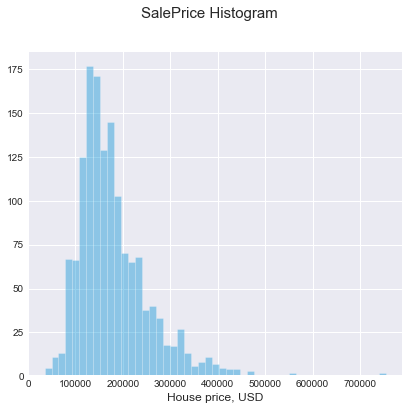

In [10]:
#SalePrice Histogram 1
#without applying kernel density function
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(6,6))
sns.distplot(df_train['SalePrice'], ax=ax, kde=False)
ax.set_xlabel('House price, USD')
plt.suptitle('SalePrice Histogram', size=15)
plt.show()

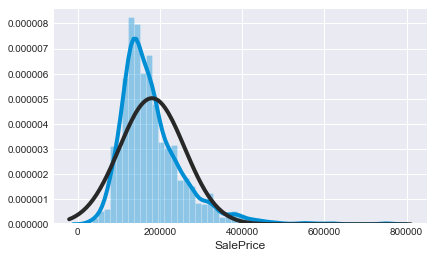

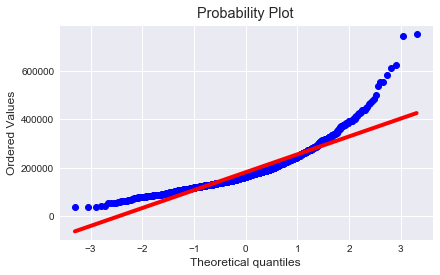

In [11]:
#SalePrice Histogram 2
#applying kernel density function
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

We will check also the Skewness and Kurtosis of the SalePrice variable in order to verify if it follows a normal distribution or not.

In [12]:
Image("Skewness_Kurtosis.PNG")

FileNotFoundError: No such file or directory: 'Skewness_Kurtosis.PNG'

FileNotFoundError: No such file or directory: 'Skewness_Kurtosis.PNG'

<IPython.core.display.Image object>

In [13]:
#SalePrice Skewness & Kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


__Comments:__ After analyzing the metrics, we realized that the SalePrice does not follow a normal distribution (Gaussian distribution).

Let's check how many houses have a price higher than 500000 USD.

In [14]:
df_train.query('SalePrice > 442567.0100000005')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,Ex,TA,PConc,Ex,TA,No,GLQ,1904,Unf,0,312,2216,GasA,Ex,Y,SBrkr,2234,0,0,2234,1,0,2,0,1,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,1166,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,268.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1330,Unf,0,122,1452,GasA,Ex,Y,SBrkr,1476,1237,0,2713,1,0,2,1,3,1,Ex,11,Typ,1,Gd,Attchd,2008.0,Fin,3,858,TA,TA,Y,126,66,0,0,0,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008.0,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,Ex,TA,PConc,Gd,TA,Gd,ALQ,1416,Unf,0,234,1650,GasA,Ex,Y,SBrkr,1690,1589,0,3279,1,0,3,1,4,1,Ex,12,Mod,1,Gd,BuiltIn,2003.0,Fin,3,841,TA,TA,Y,503,36,0,0,210,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.0,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,201

In [15]:
len(df_train.query('SalePrice > 442567.0100000005'))

15

We can see that **only 15 houses have a price more than 440.000 UDS**. It seems like we can drop them as outliers in the future.

In [196]:
#Checking the indexes related to the outliers
df_train.query('SalePrice > 442567.0100000005')
id_outliers = list(df_train.query('SalePrice > 442567.0100000005')['Id'])
print(id_outliers)

[179, 186, 441, 528, 592, 692, 770, 799, 804, 899, 1047, 1170, 1183, 1244, 1374]


In [197]:
#delete the outliers values
df_train.drop([178, 185, 440, 527, 591, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373], inplace=True)

In [198]:
#check the shape of the dataframe after deleting the outliers
df_train.shape

(1445, 81)

Let's check the main statistics and distribution of the SalePrice variable after removing the outliers values.

In [199]:
#check the main statistics of the dependent variable (SalePrice) 
df_train['SalePrice'].describe() 

count      1445.000000
mean     177082.510035
std       69614.603756
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      440000.000000
Name: SalePrice, dtype: float64

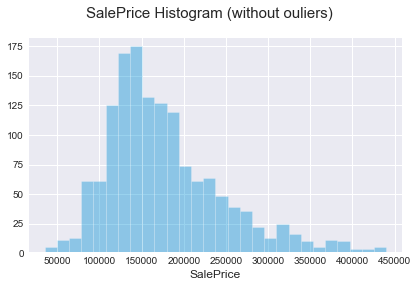

In [20]:
#Histogram 3
sns.distplot(df_train['SalePrice'], kde=False)
ax.set_xlabel('House price, USD')
plt.suptitle('SalePrice Histogram (without ouliers)', size=15)
plt.show()

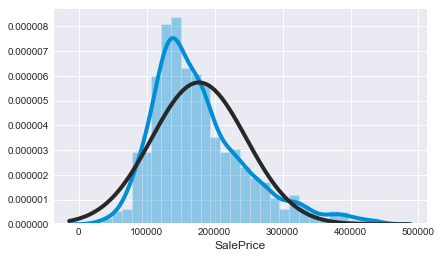

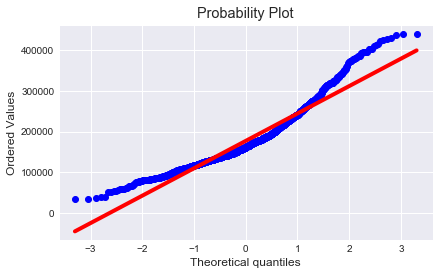

In [21]:
#SalePrice Histogram 4
#applying kernel density function
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [22]:
#SalePrice Skewness & Kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.094946
Kurtosis: 1.276040


__Comments:__
After dropping the outliears from the df_training set, we realized that the SalePrice variables shows a distribution closer to a *normal distribution*. 



__Note [1]:__
We have decided to drop the outliers from the df_training directly in order to avoid deleting records with duplicate records in the Id column, since when combining the training set and test set in a single dataframe the variable Id shows duplicate values.

## 3 Data Cleaning

### 3.1 Merging the training and test dataframes

Let's combine two datasets (X_train and df_test) and work with the data faster.

In [200]:
#generate the 'origin' column.
df_train['origin']= 0
df_test['origin']= 100

In [201]:
#create the variable df_total, which is a dataframe union of df_test and df_train
df_total = pd.concat([df_train,df_test], sort = False)

In [202]:
df_total.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,origin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,0
9,10,1

In [203]:
#check the shape of df_total
df_total.shape

(2904, 82)

In [27]:
#check the datatype of the df_total values
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 1458
Data columns (total 82 columns):
Id               2904 non-null int64
MSSubClass       2904 non-null int64
MSZoning         2900 non-null object
LotFrontage      2419 non-null float64
LotArea          2904 non-null int64
Street           2904 non-null object
Alley            198 non-null object
LotShape         2904 non-null object
LandContour      2904 non-null object
Utilities        2902 non-null object
LotConfig        2904 non-null object
LandSlope        2904 non-null object
Neighborhood     2904 non-null object
Condition1       2904 non-null object
Condition2       2904 non-null object
BldgType         2904 non-null object
HouseStyle       2904 non-null object
OverallQual      2904 non-null int64
OverallCond      2904 non-null int64
YearBuilt        2904 non-null int64
YearRemodAdd     2904 non-null int64
RoofStyle        2904 non-null object
RoofMatl         2904 non-null object
Exterior1st      2903 non-

In [204]:
#export the data to csv
df_total.to_csv('df_total.csv', index=False)

In [29]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 0 to 1458
Data columns (total 82 columns):
Id               2904 non-null int64
MSSubClass       2904 non-null int64
MSZoning         2900 non-null object
LotFrontage      2419 non-null float64
LotArea          2904 non-null int64
Street           2904 non-null object
Alley            198 non-null object
LotShape         2904 non-null object
LandContour      2904 non-null object
Utilities        2902 non-null object
LotConfig        2904 non-null object
LandSlope        2904 non-null object
Neighborhood     2904 non-null object
Condition1       2904 non-null object
Condition2       2904 non-null object
BldgType         2904 non-null object
HouseStyle       2904 non-null object
OverallQual      2904 non-null int64
OverallCond      2904 non-null int64
YearBuilt        2904 non-null int64
YearRemodAdd     2904 non-null int64
RoofStyle        2904 non-null object
RoofMatl         2904 non-null object
Exterior1st      2903 non-

In [210]:
df_total.groupby('origin').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
origin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1445,1445,1445,1187,1445,1445,91,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1438,1438,1445,1445,1445,1408,1408,1407,1408,1445,1407,1445,1445,1445,1445,1445,1445,1444,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,755,1364,1364,1364,1445,1445,1364,1364,1445,1445,1445,1445,1445,1445,1445,6,279,54,1445,1445,1445,1445,1445,1445
100,1459,1459,1455,1232,1459,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1444,1459,1459,1459,1415,1414,1415,1417,1458,1417,1458,1458,1458,1459,1459,1459,1459,1459,1459,1459,1459,1457,1457,1459,1459,1459,1459,1458,1459,1457,1459,729,1383,1381,1381,1458,1458,1381,1381,1459,1459,1459,1459,1459,1459,1459,3,290,51,1459,1459,1459,1458,1459,0


### 3.2 Missing data analysis

We are going to review how many null values we have in the dataset.

In [213]:
#check how many null values there are in the dataset
df_total.isnull().sum().sum()

15364

Really, **there are a total of 13905 records with nan values**. The remaining 1459 values are those values of the Y variable that do not appear in the test set (15364 - 13095 = 1459)

We are going to analyze the dimension of the dataset by columns and rows to decide what columns and rows should be rejected from the dataset.

#### 3.2.1 Missing per columns

Le's check the percentage of null values per column, filtering only for those columns that have NaN values.

In [214]:
#Creating table with "% missing"
total_missing = df_total.isnull().sum().sort_values(ascending=False)
percent = (df_total.isnull().sum()/df_total.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(35)

,Total,Percent
PoolQC,2895,0.996901
MiscFeature,2799,0.963843
Alley,2706,0.931818
Fence,2335,0.804063
SalePrice,1459,0.502410
FireplaceQu,1420,0.488981
LotFrontage,485,0.167011
GarageFinish,159,0.054752
GarageYrBlt,159,0.054752
GarageQual,159,0.054752


We are going to remove those columns that have a percentage of null values higher than 48%, as they do not provide enough information to analyze.

Therefore, we are going to remove the following variables from the dataset: 'Alley', 'PoolQC', 'Fence', 'MiscFeature' and 'FireplaceQu'.

In [215]:
#remove the MiscFeature, Fence, PoolQC and Alley variables
df_total.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'], axis = 1, inplace = True)

In [216]:
#check the shape of the training set after removing the variables 
df_total.shape

(2904, 77)

Now, we are going to replace the null values with the mean / median in the remaining numeric variables.

Remaining numerical variables to treat => LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, GarageYrBlt, GarageCars, GarageArea.       

In [217]:
median_LotFrontage = df_total['LotFrontage'].median(skipna = True)
median_MasVnrArea = df_total['MasVnrArea'].median(skipna = True)
median_BsmtFinSF1 = df_total['BsmtFinSF1'].median(skipna = True)
median_BsmtFinSF2 = df_total['BsmtFinSF2'].median(skipna = True)
median_BsmtUnfSF = df_total['BsmtUnfSF'].median(skipna = True)
median_TotalBsmtSF = df_total['TotalBsmtSF'].median(skipna = True)
median_BsmtFullBath = df_total['BsmtFullBath'].median(skipna = True)
median_BsmtHalfBath = df_total['BsmtHalfBath'].median(skipna = True)
median_GarageYrBlt = df_total['GarageYrBlt'].median(skipna = True)
median_GarageCars = df_total['GarageCars'].median(skipna = True)
median_GarageArea = df_total['GarageArea'].median(skipna = True)

In [218]:
print(median_LotFrontage, median_MasVnrArea , median_BsmtFinSF1, median_BsmtFinSF2, median_BsmtUnfSF, median_TotalBsmtSF)

68.0 0.0 368.0 0.0 467.0 988.0


In [219]:
print(median_BsmtFullBath, median_BsmtHalfBath, median_GarageYrBlt, median_GarageCars, median_GarageArea)

0.0 0.0 1979.0 2.0 478.0


In [220]:
df_total['MasVnrArea'].describe()

count    2882.000000
mean      100.010756
std       174.782940
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [221]:
df_total['BsmtFinSF2'].describe()

count    2903.000000
mean       49.652773
std       169.363872
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [222]:
df_total['BsmtFullBath'].describe()

count    2902.00000
mean        0.42867
std         0.52472
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         3.00000
Name: BsmtFullBath, dtype: float64

In [223]:
df_total['BsmtHalfBath'].describe()

count    2902.000000
mean        0.061337
std         0.245667
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [224]:
#compute the mean for the MasVnrArea, BsmtFinSF2, BsmtFullBath and BsmtHalfBath variables
mean_MasVnrArea = df_total['MasVnrArea'].mean(skipna = True)
mean_BsmtFinSF2 = df_total['BsmtFinSF2'].mean(skipna = True)
mean_BsmtFullBath = df_total['BsmtFullBath'].mean(skipna = True)
mean_BsmtHalfBath = df_total['BsmtHalfBath'].mean(skipna = True)

In [225]:
print(mean_MasVnrArea, mean_BsmtFinSF2, mean_BsmtFullBath, mean_BsmtHalfBath)

100.01075641915337 49.652772993455045 0.4286698828394211 0.061337008959338385


In [226]:
#replace the na/nan values by the respective median/mean
df_total['LotFrontage'] = df_total['LotFrontage'].replace(np.NaN, median_LotFrontage)
df_total['MasVnrArea'] = df_total['MasVnrArea'].replace(np.NaN, mean_MasVnrArea)
df_total['BsmtFinSF1'] = df_total['BsmtFinSF1'].replace(np.NaN, median_BsmtFinSF1)
df_total['BsmtFinSF2'] = df_total['BsmtFinSF2'].replace(np.NaN, mean_BsmtFinSF2)
df_total['BsmtUnfSF'] = df_total['BsmtUnfSF'].replace(np.NaN, median_BsmtUnfSF)
df_total['TotalBsmtSF'] = df_total['TotalBsmtSF'].replace(np.NaN, median_TotalBsmtSF)
df_total['BsmtFullBath'] = df_total['BsmtFullBath'].replace(np.NaN, mean_BsmtFullBath)
df_total['BsmtHalfBath'] = df_total['BsmtHalfBath'].replace(np.NaN, mean_BsmtHalfBath)
df_total['GarageYrBlt'] = df_total['GarageYrBlt'].replace(np.NaN, median_GarageYrBlt)
df_total['GarageCars'] = df_total['GarageCars'].replace(np.NaN, median_GarageCars)
df_total['GarageArea'] = df_total['GarageArea'].replace(np.NaN, median_GarageArea)

In [227]:
#check null values in the treated variables
df_total['LotFrontage'].isnull().sum().sum()
df_total['MasVnrArea'].isnull().sum().sum()
df_total['BsmtFinSF1'].isnull().sum().sum()
df_total['BsmtFinSF2'].isnull().sum().sum()
df_total['BsmtUnfSF'].isnull().sum().sum()
df_total['TotalBsmtSF'].isnull().sum().sum()
df_total['BsmtFullBath'].isnull().sum().sum()
df_total['BsmtHalfBath'].isnull().sum().sum()
df_total['GarageYrBlt'].isnull().sum().sum()
df_total['GarageCars'].isnull().sum().sum()
df_total['GarageArea'].isnull().sum().sum()

0

In [228]:
#check how many null values there are in the dataset (after cleaning the numerical variables)
df_total.isnull().sum().sum()

2533

After cleaning the numerical values, **we have pending to treat a toal of 1.074 nan values** without keeping in mind the SalePrice values (2533 - 1459 = 1074).

It is important to remark that we have deleted a total of 12.831 nan values (13.905 - 1.074).

#### 3.2.2 Missing per rows 

There are some rows with a lot of "NaN" values. In order to inspect it quickly, we get the total nan values for each row.

We look wich rows have more than 70% columns with "NaN" values. (i.e. with more than 12 columns empty).

In [229]:
# To get the total number for each row
nansrows = pd.DataFrame({'total_nans':df_total.isnull().sum(axis=1)})
nansrows[nansrows['total_nans']>11].count()

total_nans    0
dtype: int64

Now, we extract the total "NaN" values for each column, to look wich columns are the "typical" empty.

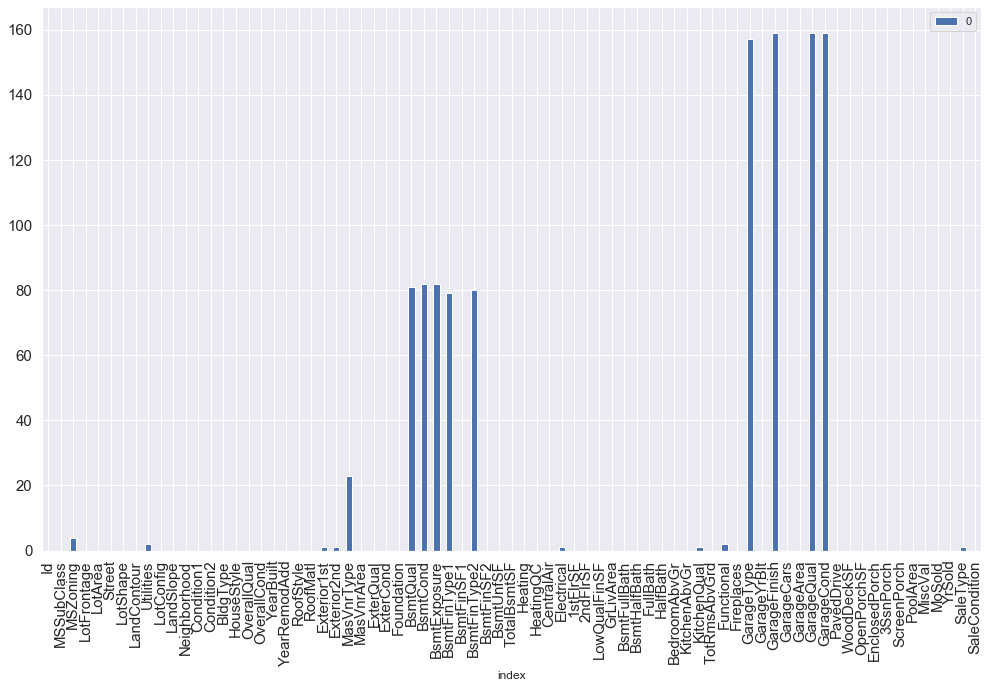

In [230]:
# Couting the total nans for each column
toplot = df_total.iloc[:, :-2].isna().sum() #we do not include the SalePrice and Origin variables
#Ploting the total nans for column
toplot.reset_index().plot(x = 'index', kind = 'bar', figsize=(15,10), fontsize = 15)

In [231]:
#Creating table with "% missing" for categorical variables
total_missing = df_total.iloc[:, :-2].isnull().sum().sort_values(ascending=False)
percent = (df_total.iloc[:, :-2].isnull().sum()/df_total.iloc[:, :-2].isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(18)

,Total,Percent
GarageCond,159,0.054752
GarageQual,159,0.054752
GarageFinish,159,0.054752
GarageType,157,0.054063
BsmtExposure,82,0.028237
BsmtCond,82,0.028237
BsmtQual,81,0.027893
BsmtFinType2,80,0.027548
BsmtFinType1,79,0.027204
MasVnrType,23,0.007920


## Now we are going to split de dataset in train and test again, in order to keep all the files of the test DS in the next steps. /* CHANGE*/


In [212]:
df_total.origin

0         0
1         0
2         0
3         0
4         0
       ... 
1454    100
1455    100
1456    100
1457    100
1458    100
Name: origin, Length: 2904, dtype: int64

In [211]:
df_total.groupby('origin').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
origin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1445,1445,1445,1187,1445,1445,91,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1438,1438,1445,1445,1445,1408,1408,1407,1408,1445,1407,1445,1445,1445,1445,1445,1445,1444,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,1445,755,1364,1364,1364,1445,1445,1364,1364,1445,1445,1445,1445,1445,1445,1445,6,279,54,1445,1445,1445,1445,1445,1445
100,1459,1459,1455,1232,1459,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1444,1459,1459,1459,1415,1414,1415,1417,1458,1417,1458,1458,1458,1459,1459,1459,1459,1459,1459,1459,1459,1457,1457,1459,1459,1459,1459,1458,1459,1457,1459,729,1383,1381,1381,1458,1458,1381,1381,1459,1459,1459,1459,1459,1459,1459,3,290,51,1459,1459,1459,1458,1459,0


In [232]:
# Split the dataset into training set and test set
df_train_clean = df_total[df_total['origin'] == 0].drop('origin', axis=1)
df_test_clean = df_total[df_total['origin'] == 100].drop('origin', axis=1)
df_train_clean.shape, df_test_clean.shape, df_total.shape

((1445, 76), (1459, 76), (2904, 77))

### Droping rows with null values in the train dataset  /* CHANGE */

We are going to remove the lines with nan values from the variables 'MSZoning', 'Functional', 'Utililies', 'SaleType', 'Electrical', 'KitchenQual', 'Exterior2nd', 'Exterior' and 'MasVnrType', as they are the ones that have the lowest percentage of null values in the dataset.

In [49]:
df_train_clean.dropna(subset = ['MSZoning'], inplace=True)
df_train_clean.dropna(subset = ['Functional'], inplace=True)
df_train_clean.dropna(subset = ['Utilities'], inplace=True)
df_train_clean.dropna(subset = ['SaleType'], inplace=True)
df_train_clean.dropna(subset = ['Electrical'], inplace=True)
df_train_clean.dropna(subset = ['KitchenQual'], inplace=True)
df_train_clean.dropna(subset = ['Exterior2nd'], inplace=True)
df_train_clean.dropna(subset = ['Exterior1st'], inplace=True)
df_train_clean.dropna(subset = ['MasVnrType'], inplace=True)

In [234]:
df_train_clean.shape

(1445, 76)

In [235]:
#Creating table with "% missing" for categorical variables
total_missing = df_train_clean.iloc[:, :-2].isnull().sum().sort_values(ascending=False)
percent = (df_train_clean.iloc[:, :-2].isnull().sum()/df_total.iloc[:, :-2].isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(9)

,Total,Percent
1stFlrSF,0.0,0.000000
2ndFlrSF,0.0,0.000000
3SsnPorch,0.0,0.000000
BedroomAbvGr,0.0,0.000000
BldgType,0.0,0.000000
BsmtCond,37.0,0.012741
BsmtExposure,38.0,0.013085
BsmtFinSF1,0.0,0.000000
BsmtFinSF2,0.0,0.000000


In [236]:
#drop the records with NaN values
df_train_clean.dropna(subset = ['GarageCond'], inplace=True)
df_train_clean.dropna(subset = ['BsmtExposure'], inplace=True)
df_train_clean.dropna(subset = ['BsmtCond'], inplace=True)
df_train_clean.dropna(subset = ['BsmtQual'], inplace=True)
df_train_clean.dropna(subset = ['BsmtFinType2'], inplace=True)

In [237]:
#check if ther are missing values after performing the changes
df_train_clean.iloc[:, :-2].isnull().sum().sum()

8

In [238]:
df_train_clean.shape

(1332, 76)

###  3.3 Splitting the data into training and test dataframes  /* CHANGE */ /* We have already done it!!! */

Before spliting the X_total into training and set, we will check how looks the 'origin' column after the normalization

In [55]:
# The train data has origin 0, and the test data 100
# df_total['origin']

0         0
1         0
2         0
3         0
4         0
       ... 
1451    100
1452    100
1455    100
1456    100
1458    100
Name: origin, Length: 2643, dtype: int64

In [56]:
#al ser los números enteros (sin decimales), esta linea no hace falta
#df_total['origin'] = round(df_total['origin'])

In [57]:
# Split the dataset into training set and test set
#df_train_clean = df_total[df_total['origin'] == 0].drop('origin', axis=1)
#df_test_clean = df_total[df_total['origin'] == 100].drop('origin', axis=1)
#df_train_clean.shape, df_test_clean.shape, df_total.shape

((1324, 76), (1319, 76), (2643, 77))

In [239]:
#drop the 'Id' column from the training and test dataframes(we do not need it to build the prediction model)
df_train_clean = df_train_clean.drop('Id', axis=1)
df_test_clean = df_test_clean.drop('Id', axis=1)

In [240]:
df_train_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [241]:
df_test_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,NaN
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,NaN
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,NaN
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,NaN
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,NaN


In [242]:
#delete the SalePrice variable from the test dataframe
df_test_clean.drop(['SalePrice'], axis = 1, inplace = True)

In [243]:
df_test_clean.shape

(1459, 74)

### 3.4 Saving the changes 

####  Exporting the data to csv  

In [244]:
#export the df_total, df_train_clean and df_test_clean data to csv to check the final data
df_total.to_csv('df_total_clean.csv', index=False)
df_train_clean.to_csv('df_train_clean.csv', index=False)
df_test_clean.to_csv('df_test_clean.csv', index=False)

In [245]:
#export the X_train with metrics to analyze the data
df_train_clean.describe().transpose().to_csv('Describe_Train-Clean.csv', index= True)

####  Saving the data in a pickle 

In [65]:
#Save the final dataframe after this preprocessing
#df_total.to_pickle("./df_total_clean_dataframe.pkl") #-> here I have the dataset prepared before completing it
#df_train_clean.to_pickle("./X_train_dataframe.pkl") #-> here I have the dataset prepared before completing it
#df_test_clean.to_pickle("./X_test_dataframe.pkl") #-> here I have the dataset prepared before completing it

In [66]:
#If we want to reload it (in order to avoid redoing the above)
#df_total = pd.read_pickle('df_total_clean_dataframe.pkl') 
#df_train_clean = pd.read_pickle('X_train_dataframe.pkl') 
#df_test_clean = pd.read_pickle('X_test_dataframe.pkl') 

## 4 Correlation Analysis  

Before starting the process of selecting the variables that will be part of our predictive model, we will analyze the correlation of numerical variables with respect to the dependent variable to review what the data shows us and make more accurate decisions.

We think that the *correlation is one of the most reliable methods when ruling out have any relation to the dependent variable of the regression prediction models*. Therefore, once the correlation is calculated, we will **delete those variables present a correlation close to zero** (between the range of +0.1 and -0.1), since they do not interfere in the variation of the price either in a negative or positive way.

In [67]:
Image("correlation_interpretation.PNG")

FileNotFoundError: No such file or directory: 'correlation_interpretation.PNG'

FileNotFoundError: No such file or directory: 'correlation_interpretation.PNG'

<IPython.core.display.Image object>

### 4.1 Preparing the data 

We have to check the correlation between the numerical independent variables (both float and integer) and the dependent variable (SalePrice).

Therefore, we are going to create 2 lists keeping in mind the data type of the df_train_clean dataframe in order to analysis the correlation of the numerical variables with the SalePrice variable.

In [68]:
#check the datatype of the df_train_clean set
df_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1324 non-null int64
MSZoning         1324 non-null object
LotFrontage      1324 non-null float64
LotArea          1324 non-null int64
Street           1324 non-null object
LotShape         1324 non-null object
LandContour      1324 non-null object
Utilities        1324 non-null object
LotConfig        1324 non-null object
LandSlope        1324 non-null object
Neighborhood     1324 non-null object
Condition1       1324 non-null object
Condition2       1324 non-null object
BldgType         1324 non-null object
HouseStyle       1324 non-null object
OverallQual      1324 non-null int64
OverallCond      1324 non-null int64
YearBuilt        1324 non-null int64
YearRemodAdd     1324 non-null int64
RoofStyle        1324 non-null object
RoofMatl         1324 non-null object
Exterior1st      1324 non-null object
Exterior2nd      1324 non-null object
MasVnrType       1324 no

In [69]:
#Create dtype lists
cat_cols = list(df_train_clean.select_dtypes('object').columns)
num_cols = list(df_train_clean.select_dtypes(include=[np.number]).columns)

#numerical variables split
flot_cols = list(df_train_clean.select_dtypes('float64').columns)
int_cols = list(df_train_clean.select_dtypes('int64').columns)

#df_number = X_train.select_dtypes(include=[np.number])

In [70]:
#check the length of the variables
len(cat_cols) + len(num_cols)

75

### 4.2 First Results & Data Visualization

Let's start our correlation analysis calculating the overall result between SalePrice and numerical variables. Then, we can split the list between float values and integer values to identify more insights in the data.

In [71]:
#check correlation between SalePrice and numerical variables
df_train_clean.corr()['SalePrice'][num_cols].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.789307
GrLivArea        0.678110
GarageCars       0.647444
GarageArea       0.608501
1stFlrSF         0.582599
TotalBsmtSF      0.574705
FullBath         0.563284
YearBuilt        0.540214
YearRemodAdd     0.531967
TotRmsAbvGrd     0.512629
GarageYrBlt      0.503009
Fireplaces       0.440428
MasVnrArea       0.416561
OpenPorchSF      0.328830
BsmtFinSF1       0.326922
WoodDeckSF       0.313527
LotFrontage      0.309434
2ndFlrSF         0.272692
HalfBath         0.246657
LotArea          0.243610
BsmtFullBath     0.221880
BsmtUnfSF        0.192790
BedroomAbvGr     0.164712
MoSold           0.073018
ScreenPorch      0.066540
3SsnPorch        0.055420
PoolArea         0.030869
MiscVal         -0.014760
YrSold          -0.028805
BsmtFinSF2      -0.032378
BsmtHalfBath    -0.046624
LowQualFinSF    -0.054593
MSSubClass      -0.083558
OverallCond     -0.111855
KitchenAbvGr    -0.118721
EnclosedPorch   -0.127004
Name: SalePrice, dtype: float64

In [72]:
#check correlation between SalePrice and Float variables
df_train_clean.corr()['SalePrice'][flot_cols].sort_values(ascending = False)

SalePrice       1.000000
GarageCars      0.647444
GarageArea      0.608501
TotalBsmtSF     0.574705
GarageYrBlt     0.503009
MasVnrArea      0.416561
BsmtFinSF1      0.326922
LotFrontage     0.309434
BsmtFullBath    0.221880
BsmtUnfSF       0.192790
BsmtFinSF2     -0.032378
BsmtHalfBath   -0.046624
Name: SalePrice, dtype: float64

__Comments and Observations:__
We realized that the 'GarageCars' (size of garage in car capacity) and 'GarageArea' (size of garage in square feet) variables are the ones that shows the higher possitive correlation with the SalePrice variable,  within the variables of the *'float variables'* group.

In [73]:
#check correlation between SalePrice and categorical variables
df_train_clean.corr()['SalePrice'][int_cols].sort_values(ascending = False)

OverallQual      0.789307
GrLivArea        0.678110
1stFlrSF         0.582599
FullBath         0.563284
YearBuilt        0.540214
YearRemodAdd     0.531967
TotRmsAbvGrd     0.512629
Fireplaces       0.440428
OpenPorchSF      0.328830
WoodDeckSF       0.313527
2ndFlrSF         0.272692
HalfBath         0.246657
LotArea          0.243610
BedroomAbvGr     0.164712
MoSold           0.073018
ScreenPorch      0.066540
3SsnPorch        0.055420
PoolArea         0.030869
MiscVal         -0.014760
YrSold          -0.028805
LowQualFinSF    -0.054593
MSSubClass      -0.083558
OverallCond     -0.111855
KitchenAbvGr    -0.118721
EnclosedPorch   -0.127004
Name: SalePrice, dtype: float64

__Comments and Observations:__
We realized that the 'OverallQual' (rates the overall material and finish of the house) and '1stFlrSF' (first Floor square feet) variables are the ones that shows the higher possitive correlation with the SalePrice variable,  within the variables of the *'integer variables'* group.

Now, we are going to build a plotting headmap to visualize the summary of the variables correlation. 


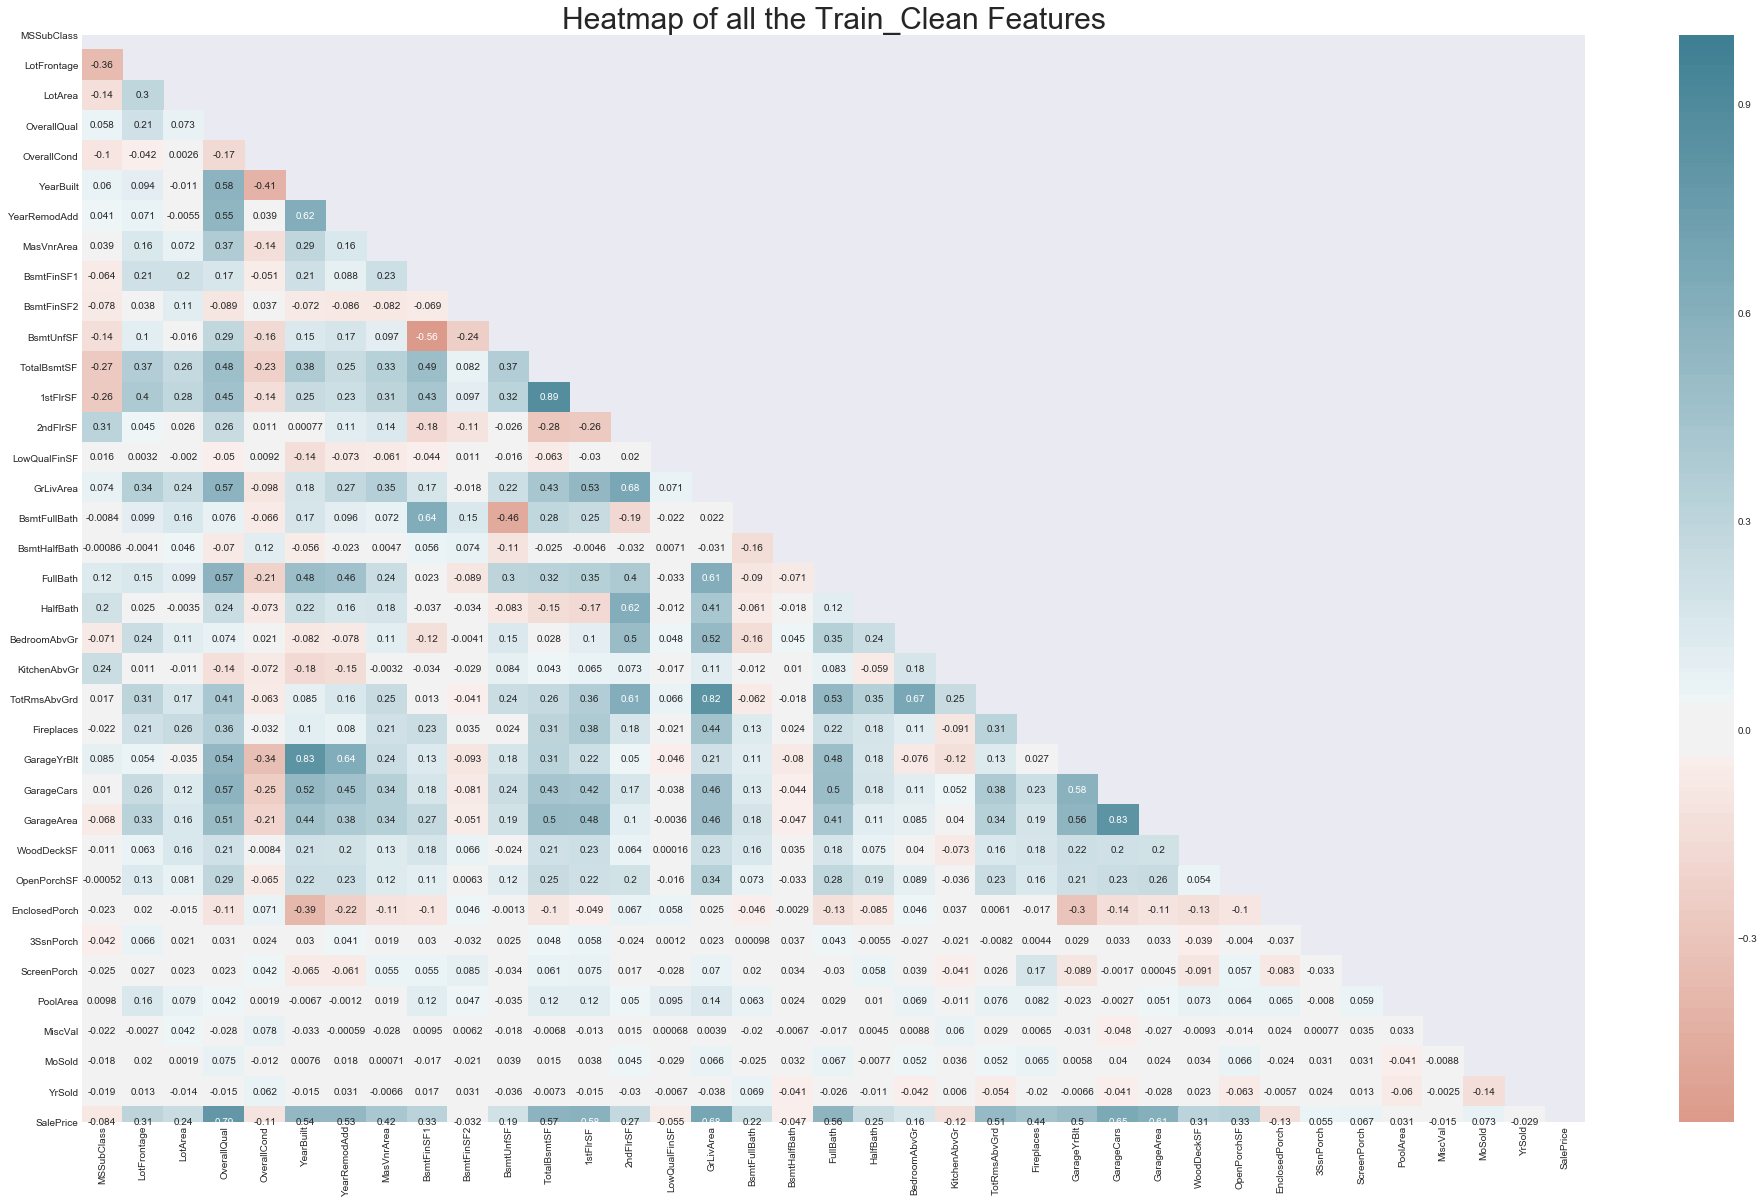

In [74]:
## Plotting heatmap. 

plt.subplots(figsize = (30,20))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train_clean.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df_train_clean.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0);
## Give title and shape. 
plt.title("Heatmap of all the Train_Clean Features", fontsize = 30);

### 4.3 Top 10 variables with the highest correlation analysis

After visualizating the correlation of all te numerical variables of the training dataset, we are going to check the performance of the top 10 variables with the highest correlation with respect to the SalePrice variable because they are the ones that have a high influence on the price of housing. 

In order to do it, we will create some heat maps and histogram graphs to check their relevance and understand the distribution of each of the variables.

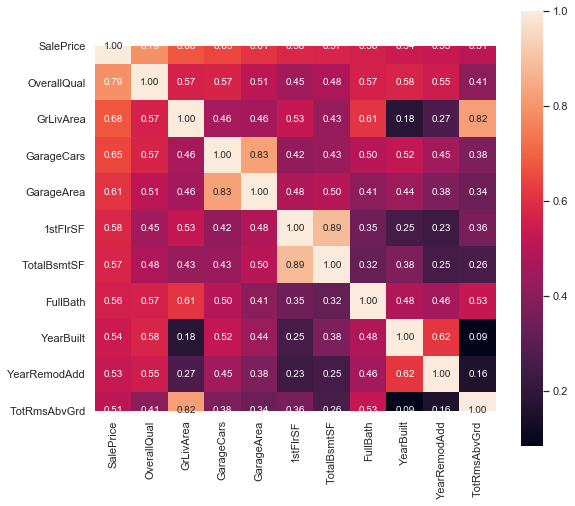

In [75]:
#Heat Map with the top 10 variables with the highest correlation to the SalePrice feature
k = 11 #number of variables for heatmap
corrmat = df_train_clean.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train_clean[cols].values.T)
plt.figure(figsize=(8, 8))
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

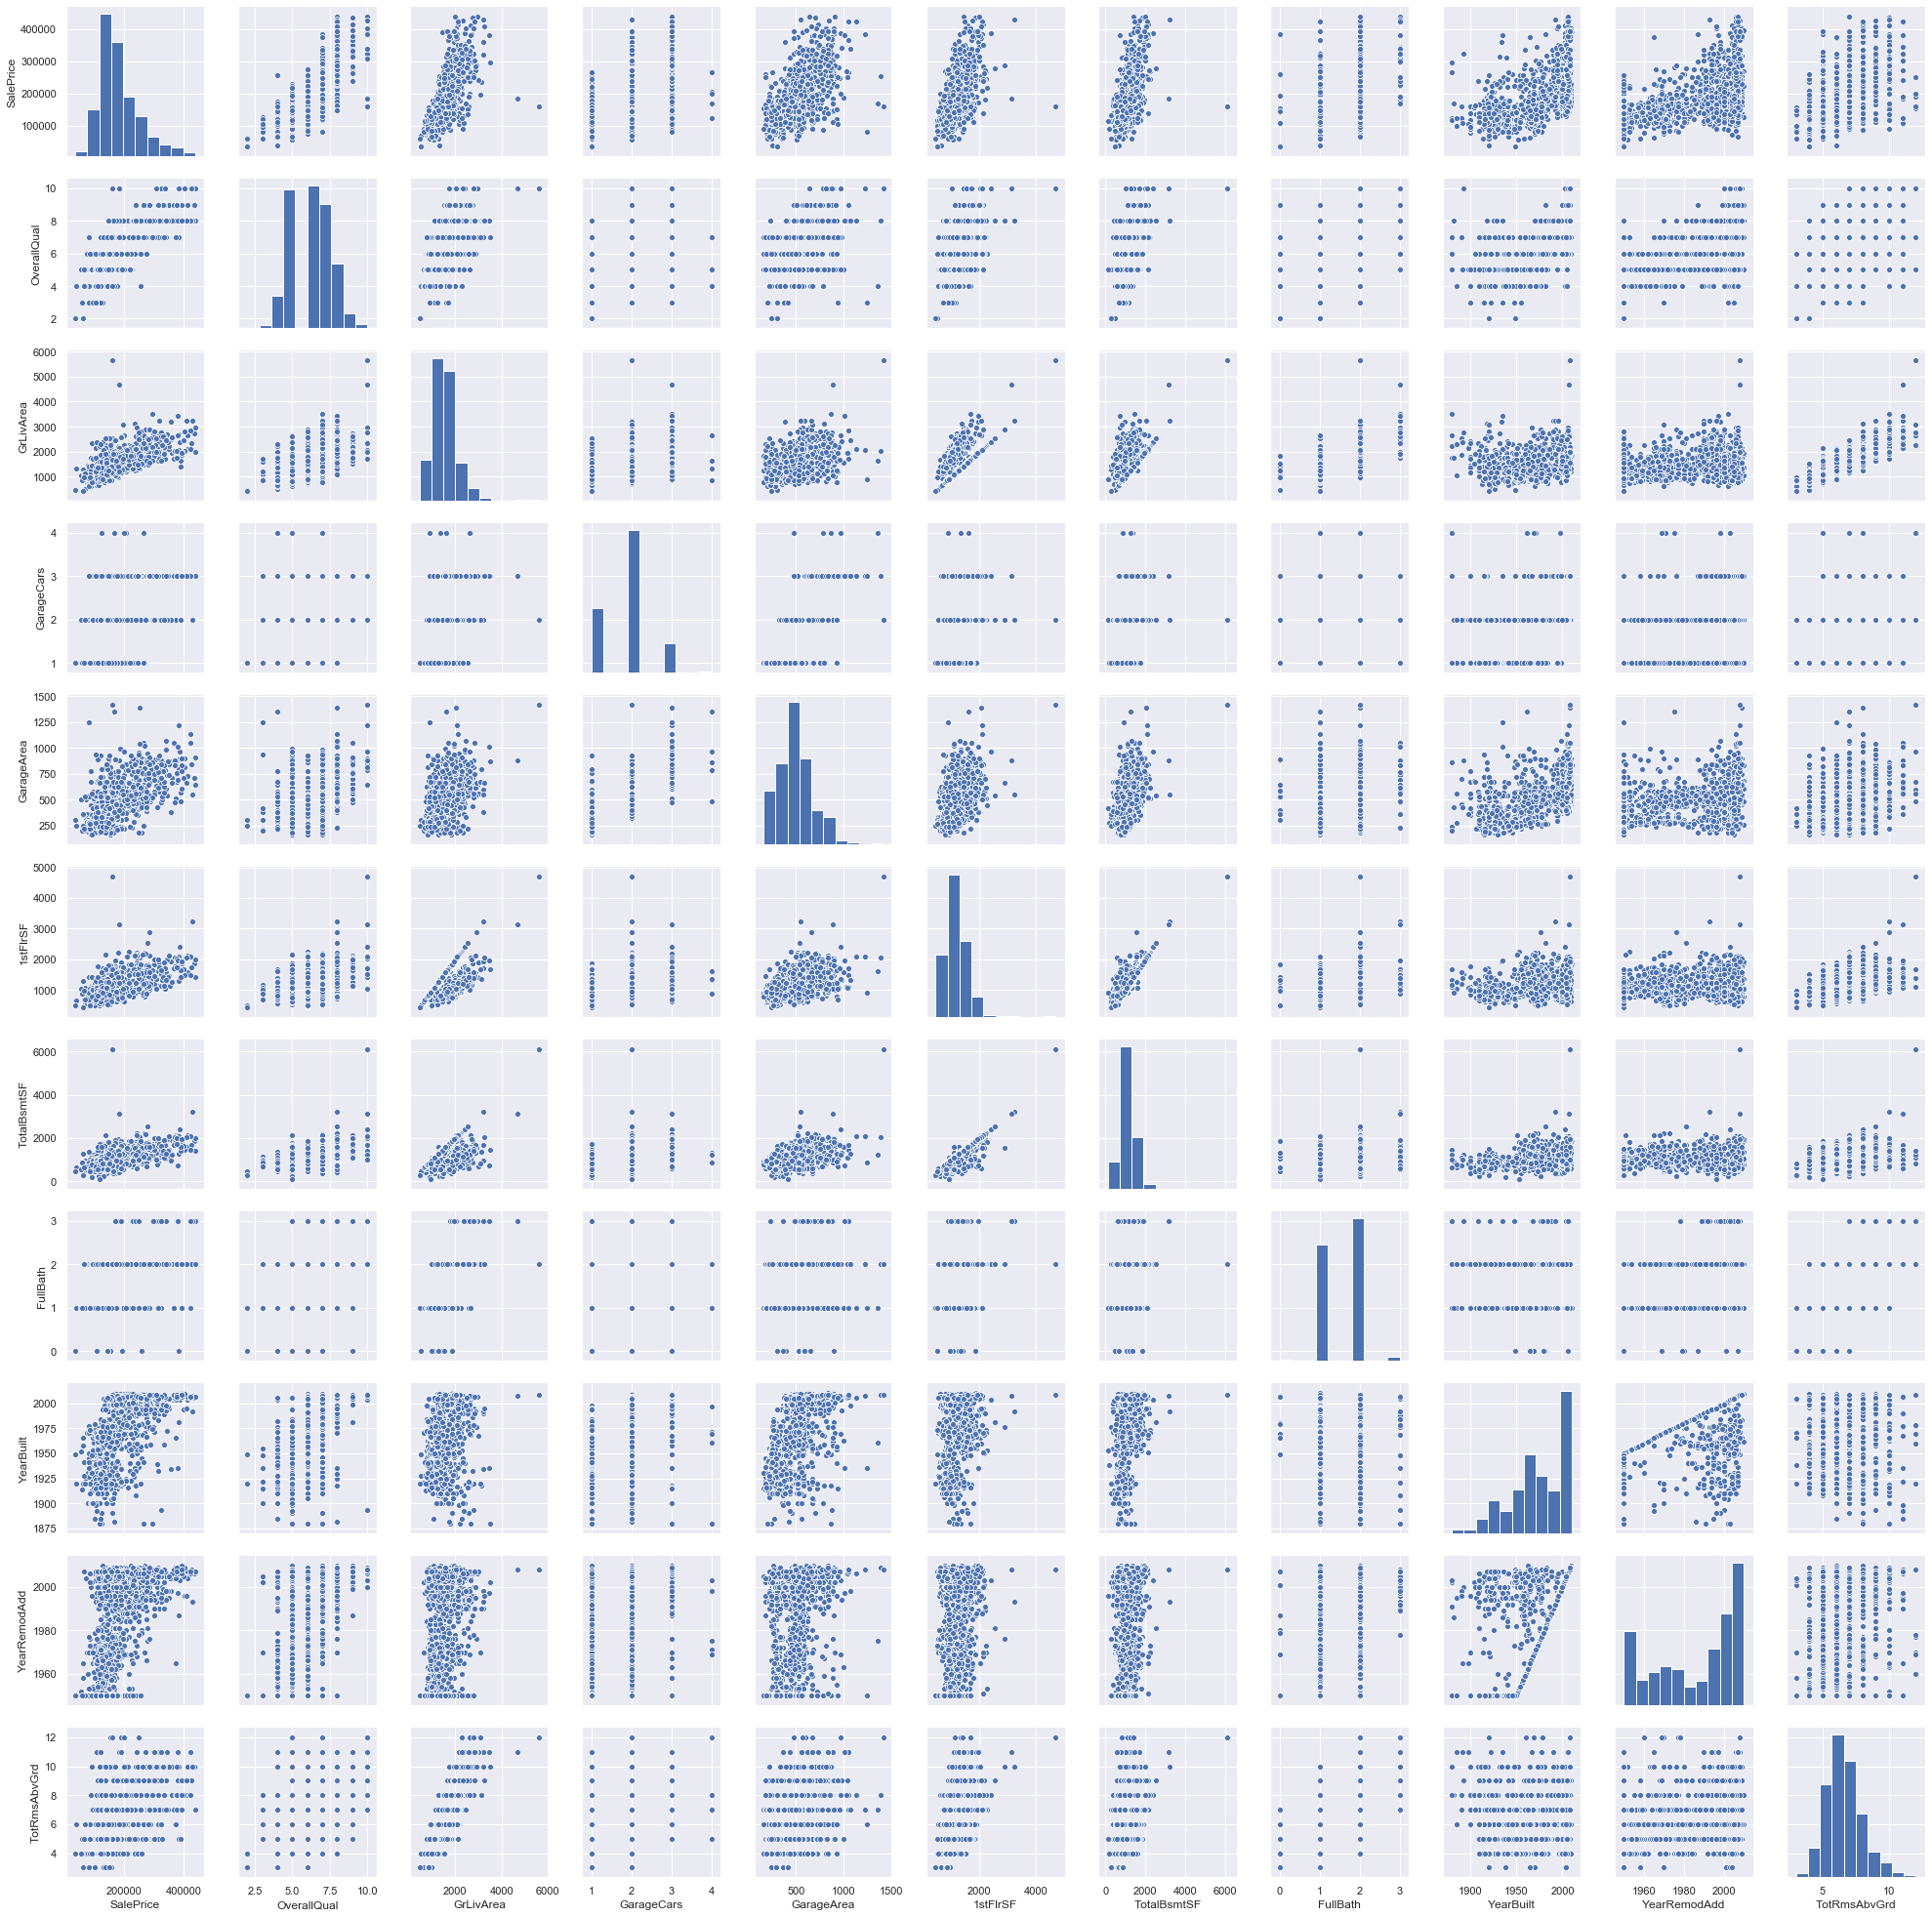

In [76]:
#Summarized information of distribution of the top 10 variables with the SalePrice feature
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd'] 
sns.pairplot(df_train_clean[cols], height = 2.5)
plt.show();

Now, we are going to start the distribution analysis of the top 10 variables with the most high correlation building histrograms for each of the variables, both float and integer.

__a) Float Variables | Distribution Analysis__

We are going to start with the analysis of the distribution of the float variables with highly correlation.

Text(0.5, 1.0, 'Garage Cars Distribution')

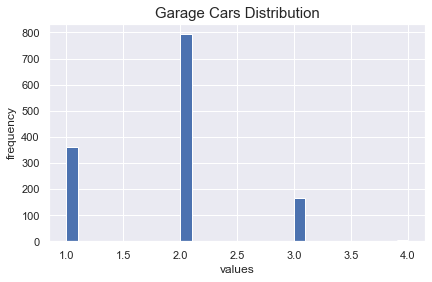

In [77]:
# GarageCars Histogram
df_train_clean['GarageCars'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Garage Cars Distribution', fontsize = 15)

In [78]:
# GarageCars relateive frequency table
100 * df_train_clean['GarageCars'].value_counts() / len(df_train_clean['GarageCars'])  

2.0    59.894260
1.0    27.265861
3.0    12.462236
4.0     0.377644
Name: GarageCars, dtype: float64

Text(0.5, 1.0, 'Garage Area Distribution')

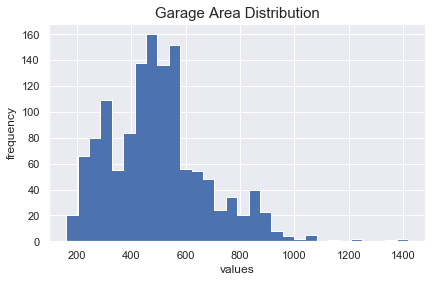

In [79]:
# GarageArea Histogram
df_train_clean['GarageArea'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Garage Area Distribution', fontsize = 15)

Text(0.5, 1.0, 'Total square feet of basement area - Distribution')

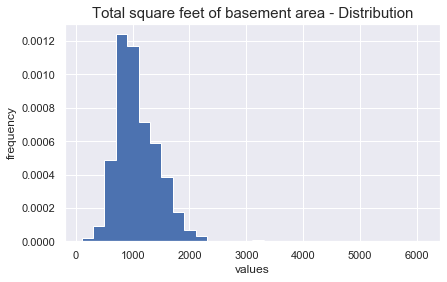

In [80]:
# TotalBsmtSF Histogram
df_train_clean['TotalBsmtSF'].hist(density=1, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Total square feet of basement area - Distribution', fontsize = 15)

Text(0.5, 1.0, 'Garage Year Built Distribution')

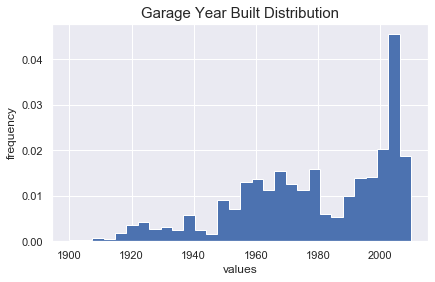

In [81]:
# GarageYrBlt Histogram
df_train_clean['GarageYrBlt'].hist(density=1, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Garage Year Built Distribution', fontsize = 15)

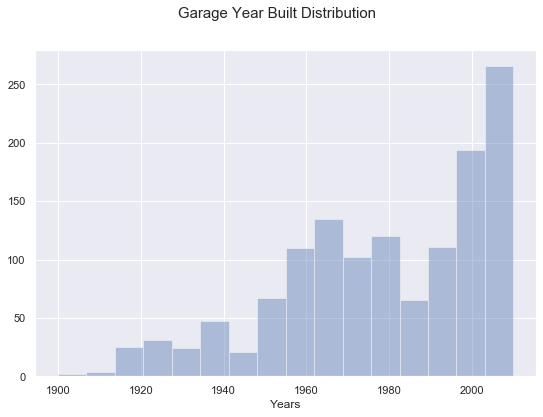

In [82]:
# GarageYrBlt Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GarageYrBlt'], ax=ax, kde=False)

ax.set_xlabel('')
plt.suptitle('Garage Year Built Distribution', size=15)
ax.set_xlabel('Years')
plt.show()

__Comments and Observations:__

* Except "Yearbuilt", the rest of the variables show an abnormal distribution with a strong influence of the values positioned on the left side of the graph.
* GarageCars analysis =>> About 60% of the sample analyzed has a space available for 2 cars, while the remaining 40% is divided into 1 and 3 slots for cars (27% for 1 car slot and 13% for 3 car slots, respectively).
* Regarding the Garage Area distribution, we observe that the garages with a capacity between 400-600 square feet are those that present a higher frequency in the analyzed sample, while the total square feet of basement with a higher frequency is between the 500 and 1500 square of feet.
* Finally, we observe that the most part of the garages built between the range of the year 1960 until the first decade of the 2000s, highlighting the high peak recorded in the first decade of the 21st century.

__b) Integer Variables | Distribution Analysis__

Let's continue with the analysis of the distribution of the integer variables with highly correlation.

Text(0.5, 1.0, 'Rates of material quality - Distribution')

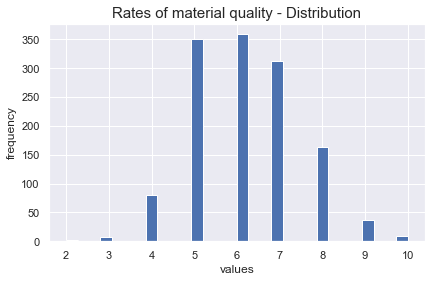

In [83]:
# OverallQual Histogram 
df_train_clean['OverallQual'].hist(density=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('Rates of material quality - Distribution', fontsize = 15)

In [84]:
# OverallQual relateive frequency table
100 * df_train_clean['OverallQual'].value_counts() / len(df_train_clean['OverallQual'])  

6     27.114804
5     26.510574
7     23.564955
8     12.386707
4      6.117825
9      2.794562
10     0.755287
3      0.604230
2      0.151057
Name: OverallQual, dtype: float64

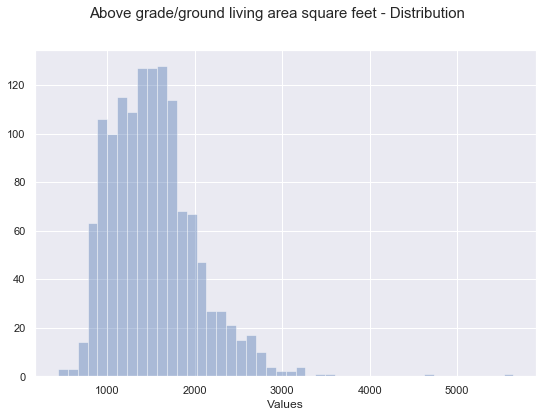

In [85]:
#GrLivArea Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['GrLivArea'], ax=ax, kde=False)

ax.set_xlabel('Values')
plt.suptitle('Above grade/ground living area square feet - Distribution', size=15)
plt.show()

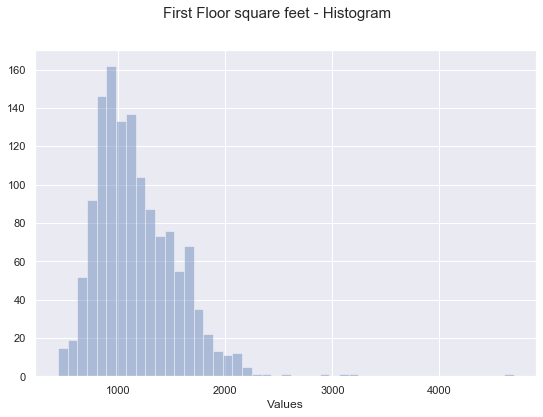

In [86]:
#1stFlrSF Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['1stFlrSF'], ax=ax, kde=False)

ax.set_xlabel('Values')
plt.suptitle('First Floor square feet - Histogram', size=15)
plt.show()

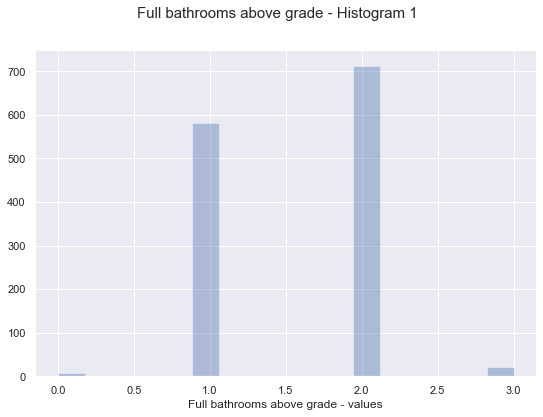

In [87]:
#FullBath Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['FullBath'], ax=ax, kde=False)

ax.set_xlabel('Full bathrooms above grade - values')
plt.suptitle('Full bathrooms above grade - Histogram 1', size=15)
plt.show()

In [88]:
# FullBath relateive frequency table
100 * df_train_clean['FullBath'].value_counts() / len(df_train_clean['FullBath'])  

2    53.851964
1    43.882175
3     1.661631
0     0.604230
Name: FullBath, dtype: float64

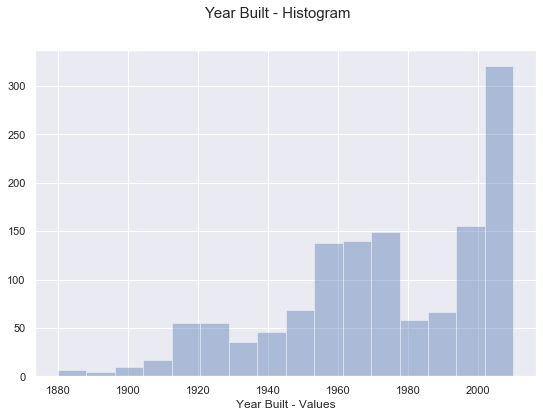

In [89]:
#YearBuilt Histogram
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['YearBuilt'], ax=ax, kde=False)

ax.set_xlabel('Year Built - Values')
plt.suptitle('Year Built - Histogram', size=15)
plt.show()

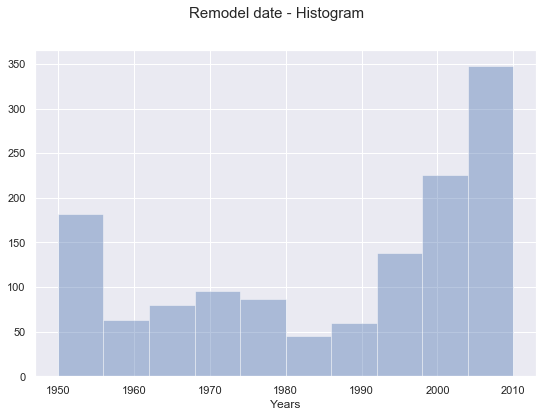

In [90]:
#YearRemodAdd Histogram
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['YearRemodAdd'], ax=ax, kde=False)

ax.set_xlabel('Years')
plt.suptitle('Remodel date - Histogram', size=15)
plt.show()

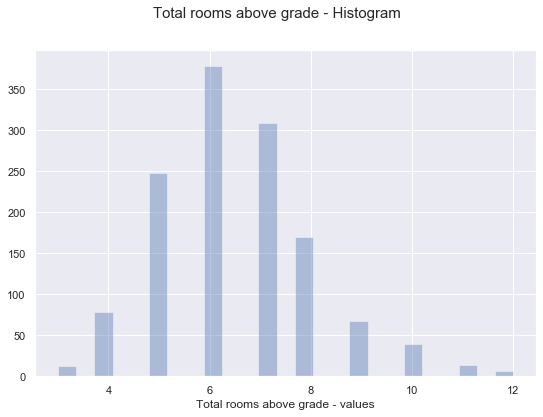

In [91]:
#TotRmsAbvGrd Histogram 
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train_clean['TotRmsAbvGrd'], ax=ax, kde=False)

ax.set_xlabel('Total rooms above grade - values')
plt.suptitle('Total rooms above grade - Histogram', size=15)
plt.show()

In [92]:
# TotRmsAbvGrd relateive frequency table
100 * df_train_clean['TotRmsAbvGrd'].value_counts() / len(df_train_clean['TotRmsAbvGrd'])  

6     28.625378
7     23.338369
5     18.731118
8     12.839879
4      5.966767
9      5.135952
10     2.945619
11     1.057402
3      0.906344
12     0.453172
Name: TotRmsAbvGrd, dtype: float64

__Comments and Observations:__

* "Rates of material quality" analysis =>> The 77% of the analyzed sample is located in ratios of 5 (Average), 6 (Above average) and 7 (Good). Barely the 12% has registered ratios of 8 (very good) and 9 (Excellent).
* Regarding the capacity, checking the TotRmsAbvGrd we realized that the 52% of the sample is located along records of 6 and 7 rooms (28.62% and 23.39% respectively), while the 54% of the records of the variable FullBath is located in two-bathroom houses and the 44% in one-bathroom houses.
* Keeping in mind the time, the construction of most of the houses was done between the 1960s and 2010, highlighting a strong peak of construction in the first decade of the 2000s. These resulst are similar to the Remodel data, so the most of the houses have been remodeled between the 1950s and 2010, highlighting a peak in the 2010s.
* Finally, we realized that the most of the recordas of the "First Floor square feet" variable is between the 500 and 1500 quare feet, while the "Above grade/ground living area square feet" show a high record between the 1000 and 2000 square feet.

### 4.4 Deleting variables with low correlation

To finalize the correlation analysis, we are going to remove those numerical variables that have a correlation equal or close to 0 (between the range +0.10 and -0.10), becuase they do not show a relation with respect to the SalePrice varialbe.

The numerical variables susceptible to removal are as follows:

* MoSold (0.073018)
* ScreenPorch (0.066540)
* 3SsnPorch (0.055420)
* PoolArea (0.030869)
* MiscVal (-0.014760)
* YrSold (-0.028805)
* LowQualFinSF (-0.054593)
* MSSubClass (-0.083558)
* BsmtFinSF2 (-0.032378)
* BsmtHalfBath (-0.046624)

In [246]:
#remove variables with low correlation
df_train_clean.drop(['MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass',
               'BsmtFinSF2', 'BsmtHalfBath'], axis = 1, inplace = True)

In [247]:
#check the shape of the dataframe after removing the variables with low correlation
df_train_clean.shape

(1332, 65)

In [248]:
#check the columns after removing the variables with low correlation
df_train_clean.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'SalePrice']

In addition, we have to implement in the test set the same changes we made earlier in the training set in order to have the inforamtion in the same format and get realistic results.

In [249]:
#loading the X_test dataset
X_test = pd.read_csv('df_test_clean.csv')
#check the shape of the test set
X_test.shape

(1459, 74)

Therefore, we proceed to remove those variables that show a low correlation with respect to the SalePrice variable.

In [250]:
#remove variables with low correlation
X_test.drop(['MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass',
               'BsmtFinSF2', 'BsmtHalfBath'], axis = 1, inplace = True)

In [251]:
#check the shape of the test set after removing variables with low correlation
X_test.shape

(1459, 64)

## 5 Categorical Data Analysis

In order to obtain clean data for building the prediction models, in the previous sections, we have analyzed the data sets considering only the numerical features. In this section, we will analyze the behavior of the categorical values and their impact on predicted value. To this end, we will start plotting the categorical values and then we will analyze their distribution in order to assess if they can potentially be discarded, or if need to be analyzed deeply. If the analyzed categorical feature presents a uniform distribution we have established their possible discarding (i.e. all categories with the same or similar values), otherwise the feature must be analyzed individually considering even the inclusion of dummy variables if the feature has few categories (at most 4) in order to enrich the data set and the accuracy of the future prediction model.

### 5.1 Overview and first visualizations

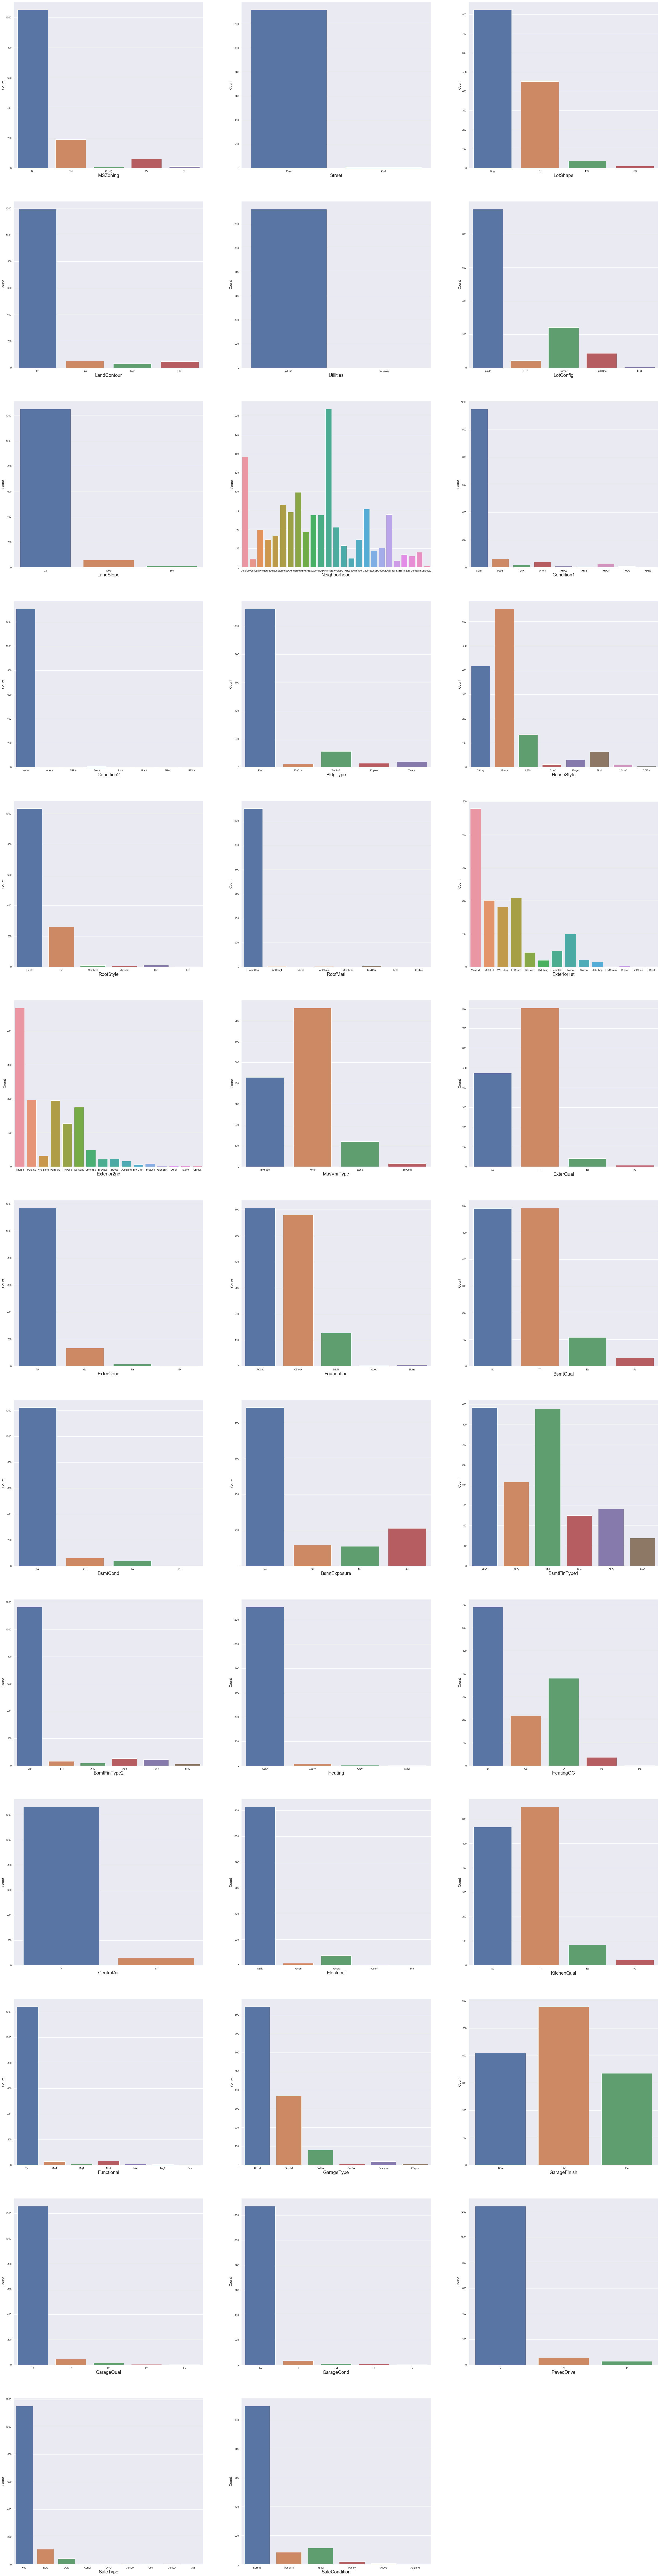

In [99]:
#Count plots for categorical variables

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(20,240))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    sns.countplot(df_train_clean[feature])
    plt.xlabel(f'{feature}', size=20)
    plt.ylabel('Count', size=15)
plt.show()

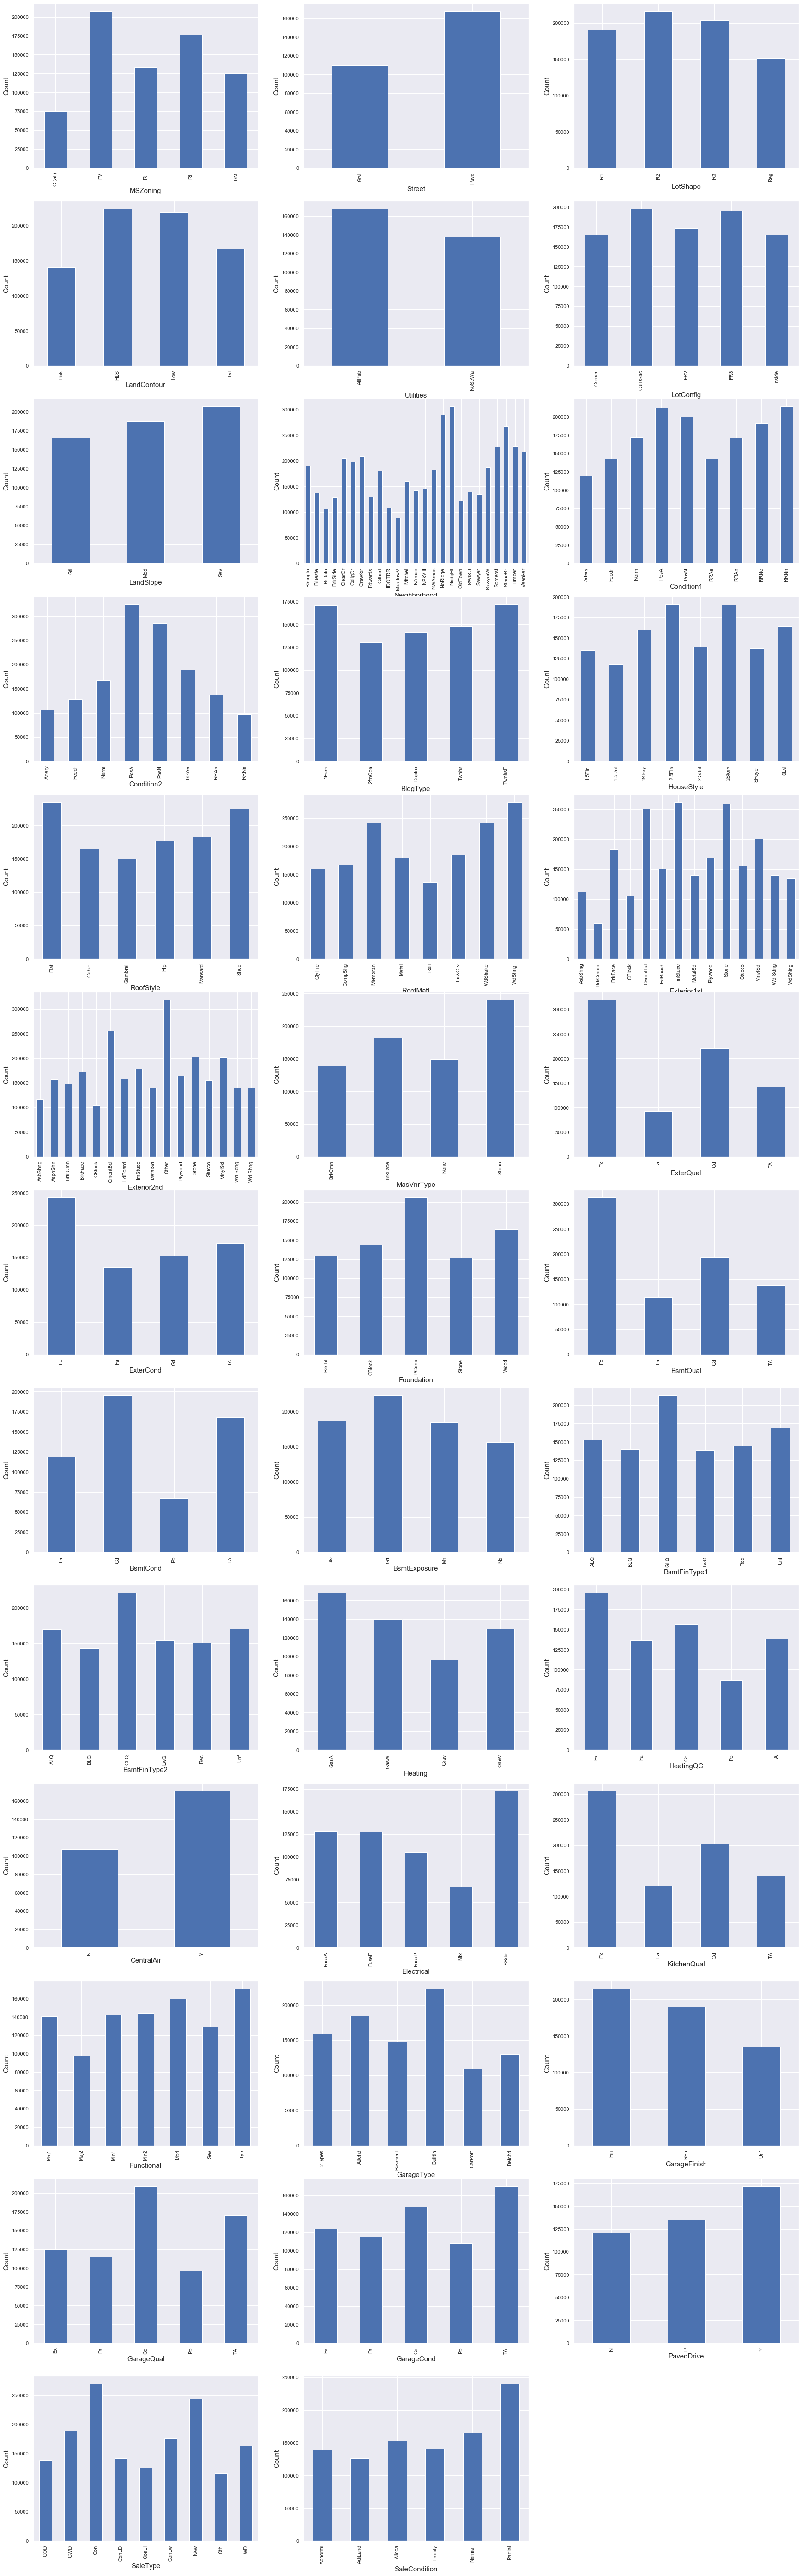

In [100]:
# Categorised Mean/Median for categorical data

fig, axes = plt.subplots(ncols=2, nrows=0, figsize =(12,120))
sns.color_palette("husl", 8)
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 3,i)
    df_train_clean.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(f'{feature}', size=15)
    plt.ylabel('Count', size=15)
plt.show()

__Comments and Observatons:__


It seems that we find a high volume of categorical variables, which have a very dispersed data distribution, so it is difficult to quantify whether they can all provide the same value when constructing the model.

Therefore, in order to analyze which are the most impactful categorical variables, we will analyze them one by one and evaluate whether they are worth converting them into dummy variables to build a robust predictive model.

### 5.2 Detailed analysis and adjustments

Next, we will analyze each of the variables to see what information they provide us and check if it can add value to the model or not.

__a) MSZoning__

The variable MSZoning identifies the general zoning classification of the sale (agriculture, commercial, residential, etc).

* A	Agriculture
* C	Commercial
* FV	Floating Village Residential
* I	Industrial
* RH	Residential High Density
* RL	Residential Low Density
* RP	Residential Low Density Park 
* RM	Residential Medium Density
	

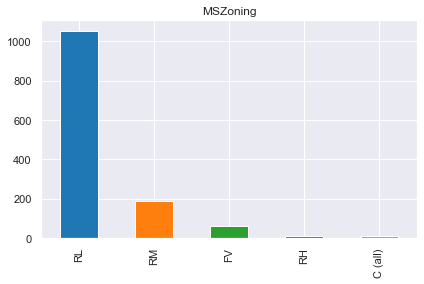

In [101]:
# MSZoning bar chart
plot = df_train_clean['MSZoning'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='MSZoning')

__b) Street__

The variable Street identifies the type of road access to property (gravael or paved).

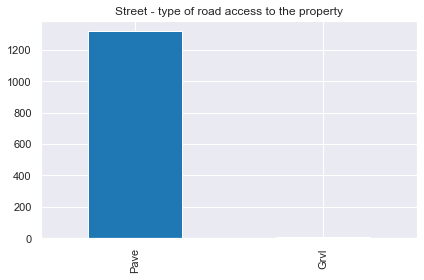

In [102]:
# Street bar chart
plot = df_train_clean['Street'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Street - type of road access to the property')

Comments =>> It could be interesting to convert the Street variable into dummy.

__c) LotShape__

The variable LotShape identifies the general shape of property.

* Reg	- Regular	
* IR1	- Slightly irregular
* IR2	- Moderately Irregular
* IR3	- Irregular

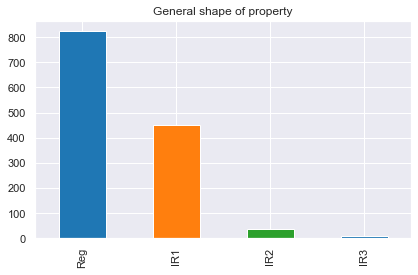

In [103]:
# LotShape bar chart
plot = df_train_clean['LotShape'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='General shape of property')

Comments =>> It could be interesting to convert the Street variable into dummy.

__d) LandContour__

The variable LandContour identifies the flatness of the property.

* Lvl	- Near Flat/Level	
* Bnk	- Banked - Quick and significant rise from street grade to building
* HLS	- Hillside - Significant slope from side to side
* Low	- Depression

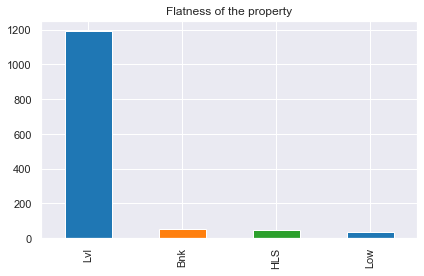

In [104]:
# LandContour bar chart
plot = df_train_clean['LandContour'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Flatness of the property')

Comments =>> It could be interesting to convert the Street variable into dummy.

__e) Utilities__

The variable Utilities identifies the type of utilities available (all public utilities, electricity, gas, water, etc).

* AllPub	-- All public Utilities (E,G,W,& S)	
* NoSewr	-- Electricity, Gas, and Water (Septic Tank)
* NoSeWa	-- Electricity and Gas Only
* ELO	-- Electricity only	

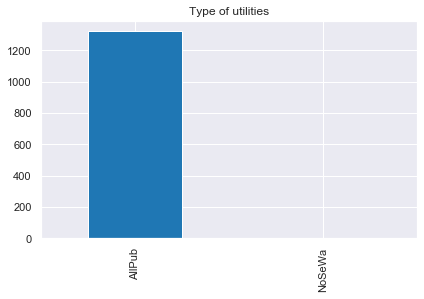

In [105]:
# Utilities bar chart
plot = df_train_clean['Utilities'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Type of utilities')

Comments =>> It could be interesting to convert the Utilities variable into dummy.

__f) LotConfig__

The variable LotConfig identifies the lot configuration.

* Inside	-- Inside lot
* Corner	-- Corner lot
* CulDSac	-- Cul-de-sac
* FR2	-- Frontage on 2 sides of property
* FR3	-- Frontage on 3 sides of property

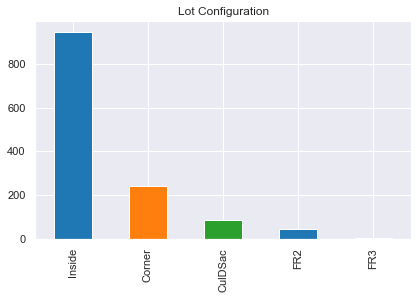

In [106]:
# Utilities bar chart
plot = df_train_clean['LotConfig'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Lot Configuration')

Configuration =>> I am not sure if it has sense to include this variable or not (I could not understand the meaning of it) 

__g) LandSlope__

The variable LandSlope identifies the slope of property.

* Gtl	-- Gentle slope
* Mod	-- Moderate Slope	
* Sev	-- Severe Slope

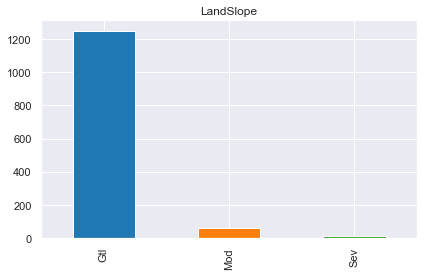

In [107]:
# LandSlope bar chart
plot = df_train_clean['LandSlope'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='LandSlope')

Comments =>> It could be interesting to convert the LandSlope variable into dummy and work together with the variable LandContour.

__h) Neighborhood__

The variable Neighborhood identifies the physical locations within Ames city limits.

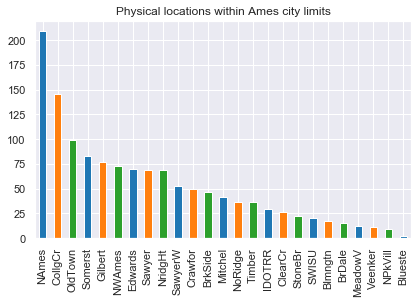

In [108]:
# LandSlope bar chart
plot = df_train_clean['Neighborhood'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Physical locations within Ames city limits')

Comments =>> I am not sure if it has sense to include this variable or not in the model.

__i) Condition1__

The variable Condition1 identifies the proximity to various conditions.

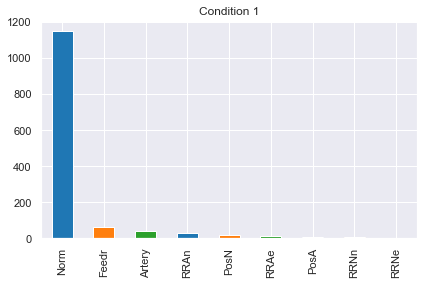

In [109]:
# Condition1 bar chart
plot = df_train_clean['Condition1'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Condition 1')

In [110]:
# Condition2 relateive frequency table
100 * df_train_clean['Condition1'].value_counts() / len(df_train_clean['Condition1'])

Norm      86.782477
Feedr      4.758308
Artery     3.172205
RRAn       1.963746
PosN       1.435045
RRAe       0.755287
PosA       0.604230
RRNn       0.377644
RRNe       0.151057
Name: Condition1, dtype: float64

__j) Condition2__

The variable Condition2 identifies the proximity to various conditions (if more than one is present).

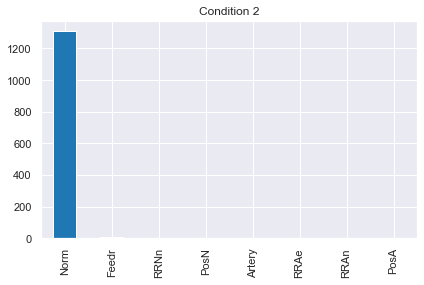

In [111]:
# Condition1 bar chart
plot = df_train_clean['Condition2'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Condition 2')

In [112]:
# Condition2 relateive frequency table
100 * df_train_clean['Condition2'].value_counts() / len(df_train_clean['Condition2'])

Norm      98.942598
Feedr      0.377644
RRNn       0.151057
PosN       0.151057
Artery     0.151057
RRAe       0.075529
RRAn       0.075529
PosA       0.075529
Name: Condition2, dtype: float64

__k) BldgType__

The variable BldgType identifies the type of dwelling/housing.

* 1Fam	-- Single-family Detached	
* 2FmCon	-- Two-family Conversion; originally built as one-family dwelling
* Duplx	-- Duplex
* TwnhsE	-- Townhouse End Unit
* TwnhsI	-- Townhouse Inside Unit


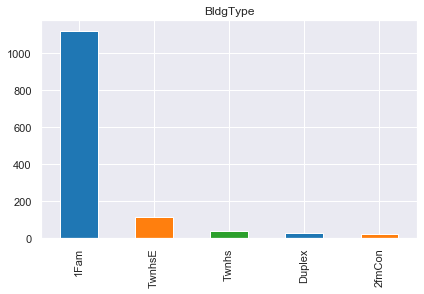

In [113]:
# BldgType bar chart
plot = df_train_clean['BldgType'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='BldgType')

Comments =>> It could be interesting to convert the BldgType variable into dummy. 

__l) HouseStyle__

The variable BldgType identifies the style of dwelling/housing.

* 1Story	One story
* 1.5Fin	One and one-half story: 2nd level finished
* 1.5Unf	One and one-half story: 2nd level unfinished
* 2Story	Two story
* 2.5Fin	Two and one-half story: 2nd level finished
* 2.5Unf	Two and one-half story: 2nd level unfinished
* SFoyer	Split Foyer
* SLvl	Split Level

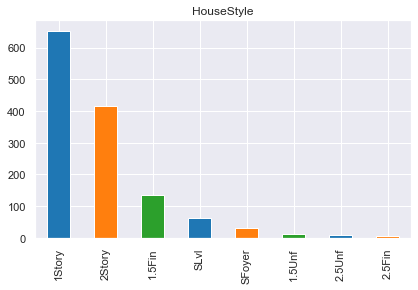

In [114]:
# BldgType bar chart
plot = df_train_clean['HouseStyle'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='HouseStyle')

__m) RoofStyle__

The variable RoofStyle identifies the type of roof.

* Flat	-- Flat
* Gable	-- Gable
* Gambrel	-- Gabrel (Barn)
* Hip	-- Hip
* Mansard	-- Mansard
* Shed	-- Shed

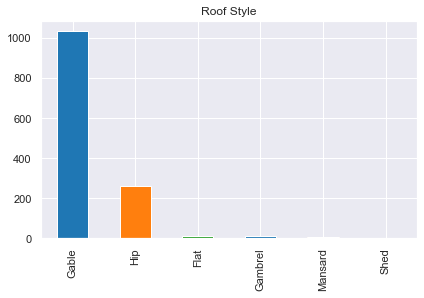

In [115]:
# RoofStyle bar chart
plot = df_train_clean['RoofStyle'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Roof Style')

In [116]:
# RoofStyle relateive frequency table
100 * df_train_clean['RoofStyle'].value_counts() / len(df_train_clean['RoofStyle'])

Gable      78.096677
Hip        19.712991
Flat        0.830816
Gambrel     0.755287
Mansard     0.453172
Shed        0.151057
Name: RoofStyle, dtype: float64

__n) RoofMatl:__

The variable RoofMatl:  identifies the roof material.

* ClyTile	Clay or Tile
* CompShg	Standard (Composite) Shingle
* Membran	Membrane
* Metal	Metal
* Roll	Roll
* Tar&Grv	Gravel & Tar
* WdShake	Wood Shakes
* WdShngl	Wood Shingles

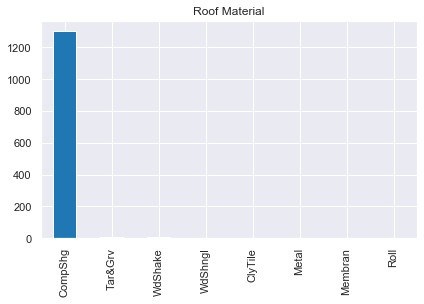

In [117]:
# RoofStyle bar chart
plot = df_train_clean['RoofMatl'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Roof Material')

In [118]:
# RoofMatl relateive frequency table
100 * df_train_clean['RoofMatl'].value_counts() / len(df_train_clean['RoofMatl'])

CompShg    98.338369
Tar&Grv     0.679758
WdShake     0.377644
WdShngl     0.302115
ClyTile     0.075529
Metal       0.075529
Membran     0.075529
Roll        0.075529
Name: RoofMatl, dtype: float64

__o) Exterior1st:__

The variable Exterior1st identifies the exterior covering on house.


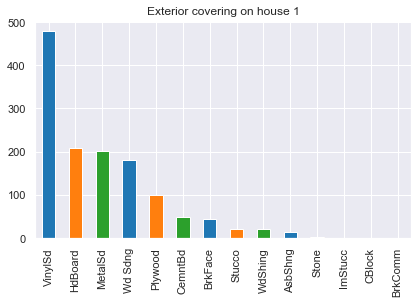

In [119]:
# RoofStyle bar chart
plot = df_train_clean['Exterior1st'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], 
                                                         title='Exterior covering on house 1')

__p) Exterior2nd:__

The variable Exterior2nd identifies the exterior covering on house (if more than one material).

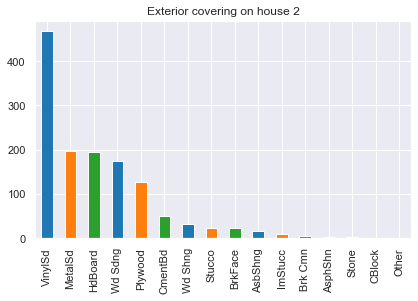

In [120]:
# RoofStyle bar chart
plot = df_train_clean['Exterior2nd'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], 
                                                         title='Exterior covering on house 2')

__q) MasVnrType:__

The variable MasVnrType identifies the masonry veneer type.

* BrkCmn	-- Brick Common
* BrkFace	-- Brick Face
* CBlock	-- Cinder Block
* None	-- None
* Stone	-- Stone

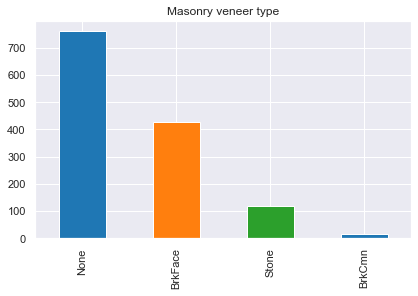

In [121]:
# RoofStyle bar chart
plot = df_train_clean['MasVnrType'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], title='Masonry veneer type')

Comments =>> I am not sure if it has sense to include this variable or not in the model.

__r) ExterQual:__

The variable ExterQual evaluates the quality of the material on the exterior.

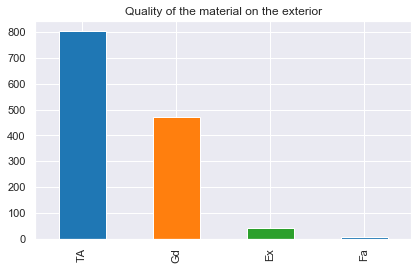

In [122]:
# ExterQual bar chart
plot = df_train_clean['ExterQual'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], 
                                                    title='Quality of the material on the exterior')

Comments =>> I am not sure if it has sense to include this variable or not in the model.

__s) ExterCond:__

The variable ExterCond evaluates the present condition of the material on the exterior.

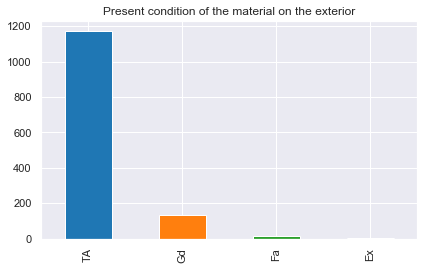

In [123]:
# ExterCond bar chart
plot = df_train_clean['ExterCond'].value_counts().plot(kind='bar', 
                                                      color=['tab:blue','tab:orange','tab:green'], 
                                                    title='Present condition of the material on the exterior')

Comments =>> I am not sure if it has sense to include this variable or not in the model.

__Summary of variables that could be transformed into dummy due to  its characteristics:__

* Street (2 options)
* LotShape (4 options)
* LandContour (4 options)
* MasVnrType (4 options)
* ExtrQual (4 options)
* ExtCond (4 options)
* Utilities (2 options)
* LandSlope (3 options)
* BldgType (5 options)

## 6 Building a baseline model applying Logistic Regression 

### 6.1 Preparing the data

#### 6.1.1 Getting the Dependent and Independent variables

In [287]:
df_train_clean.shape

(1332, 65)

In [258]:
#Getting the Dependent and Independent variables
X_train = df_train_clean.iloc[:, :-1] #all lines, all columns except the last one
y_train = df_train_clean.iloc[:, 64] #all lines, only the last column

In [259]:
#check the shaape of X_train and y_train
X_train.shape, y_train.shape

((1332, 64), (1332,))

In [261]:
#export the X_train and y_train data to csv to check the final data
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

#### 6.1.2 Creating new dataframes based on the data type 

Let's start the creation of our prediction model builing some dataframes related to the datatype of the variables that are part of X_train. These dataframes will help us to build a pilot model composed of only numerical variables.

Then, we are going to add categorical variables to our model to improve the score and the power prediction of the model.

In [262]:
##Create dtype dataframes
#create a dataframe with only categorical variables
df_object = X_train.select_dtypes(include=[object])
#create a dataframe with only numerical variables
df_number = X_train.select_dtypes(include=[np.number])

In [263]:
df_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [264]:
df_object.shape

(1332, 38)

In [265]:
#check the columns of the df_object dataframe
df_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Comments =>> We realized that we have a total of 38 numerical variables. For our predictive model, we have to convert them to numerics in order to be able to apply algorithms such as logistics regression and random forest. However, we can not transform them all at once, as in some cases it is convenient to turn some variables into dummy to achieve a positive impact on the total set of the model.

In the following section, you will find more details about the categorical varaibles treatment. 

In [266]:
df_number.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,1.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,1262,0,1262,0.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,920.0,920,866,1786,1.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,756.0,961,756,1717,1.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272
4,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,2198,1.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0


In [132]:
df_number.shape

(1324, 26)

In [267]:
#check the columns of the df_number dataframe
df_number.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch'],
      dtype='object')

Comments => We realized that we have a total of 26 numerical variables. For our predictive model, we can we consider all the numerical variables, since both Logistics Regression and Random Forest operate with numerical variables and the volume is not very high.

### 6.2 Build a model with only numerical variables 

#### 6.2.1 Pilot Model 1 (numerical variables with correlation > [+0.5 & -0.5] )

Let's start creating a pilot model only with those variables that have a higher correlation with respect to the dependent variable (more than 0.50 of correlation).

In [268]:
pilot_model_1 = df_number[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt']]

In [269]:
pilot_model_1.shape

(1332, 11)

In [270]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_1 = LogisticRegression (random_state = 0)
log_regressor_1.fit(pilot_model_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

__Important Note:__ The classifier learns the correlation between the df_number and the x_train. 

Now, let's start calculating the $R^2$ (coefficient of determination) regression score function, which determines the quality of the model to replicate the results and the proportion of variation of the results that can be explained by the model.

**Best possible score is 1.0 and it can be negative** (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.

In [271]:
#Compute Score (𝑅2) for the pilot_model_1 and y_training
print('Training Score: {}'.format(log_regressor_1.score(pilot_model_1, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_1 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_1.predict(pilot_model_1) - y_train)**2)))

Training Score: 0.21846846846846846
Training MSE: 1259131395.174174


#### 6.2.2 Pilot Model 2 (all numerical variables)

Now, we are going to include all the numerical varaibles into the pilot model in order to check its performance and define a preliminary baseline.

In [272]:
pilot_model_2 = df_number[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF']]

In [273]:
pilot_model_2.shape

(1332, 26)

In [274]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_2 = LogisticRegression (random_state = 0)
log_regressor_2.fit(pilot_model_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [275]:
#Compute Score (𝑅2) for the pilot_model_2 and y_training
print('Training Score: {}'.format(log_regressor_2.score(pilot_model_2, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_2 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_2.predict(pilot_model_2) - y_train)**2)))

Training Score: 0.6148648648648649
Training MSE: 521839161.5202703


__Comments:__ We realized that the Score and the MSE have improved after includding all numerical variables, which present a significant level of correlation with respect to the dependent variable.

__Note [2]:__ We tried to improve the performance of the model checking the distribution of all the numerical variables that are part of the model to see what kind of distribution they showed and adjusting the distribution of those variables that followed a distribution close to the Gaussian by applying logarithms. 

However, we realized that the score of the Logistics Regression worsened after applying logaritm functions, so we decided  not to use this method to improve model performance, as the results are not as expected.

You can check the details of our analysis clicking in the following link:

[Notebook - Testing Variables Distribution Applying 'Logarithms'](https://github.com/lmendezotero/Postgraduate-Project/blob/master/House%20Prices%20Prediction/Testing%20Variables%20Distribution%20Applying%20'Logarithms'.ipynb)

### 6.3. Build a model with numerical and categorical variables 

#### 6.3.1 Convert some categorical variables into dummy variables

The first step to build our predictive model keeping in mind both numerical and categorical variables is to convert into dummy those categorical variables that have a positive impact on the model and that have few options/classes in order to avoid a significantly increase the number of features in the dataset. 

We do not want to make this notebook too extensive and include the necessary code without falling into redundancies. So, we have already done this analysis in other notebooks, which are linked to this current file.

In the following Jupyter Notebook you can see the analysis performed in which we converted into dummy variables all the variables that seemed to us subject to being converted and the impact of each variable on the performance of the model: 

[Categorical Data - Dummy Variables Testing](https://github.com/lmendezotero/Postgraduate-Project/blob/master/House%20Prices%20Prediction/Categorical%20Data%20-%20Dummy%20Variables%20Testing.ipynb)

However, we found that certain variables ('ExterCond', 'Utilities' and 'Street') that were transformed to dummy did not provide a positive impact on the model. So, we have to exclude these variables from the dummy analysis and we created a final version of the Notebook, in which we have tested the performance of the model with all the choosen dummy variables and the remaining categorical variables converted into numbers.

You can check the details of our analysis in the Jupyter Notebook:

[Categorical Variables - Analysis & Testing.ipynb](https://github.com/lmendezotero/Postgraduate-Project/blob/master/House%20Prices%20Prediction/Categorical%20Data%20-%20Analysis%20%26%20Testing.ipynb)

So, let's go!

We are going to start building our predictive model converting the choosen categorical variables into dummy.

In [295]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',

In [288]:
#convert the choosen categorical variables into dummy variables
X_train = pd.get_dummies (X_train, columns = ['LotShape', 'LandContour', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual', 
                                              'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 
                                              'GarageFinish', 'PavedDrive'])
                                              
#check the shape of df_object after converting the variables into dummy
X_train.shape

KeyError: "None of [Index(['LotShape', 'LandContour', 'LandSlope', 'BldgType', 'MasVnrType',\n       'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir',\n       'KitchenQual', 'GarageFinish', 'PavedDrive'],\n      dtype='object')] are in the [columns]"

In [278]:
#check the name of the columns after converting the variables into dummy
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',

Now, we proceed to merge all the dummy variables in the same pilot_model.

In [279]:
#numerical model + dummy variables
pilot_model_3 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'LandSlope_Gtl','LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1', 
                           'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
                           'LandContour_Low', 'LandContour_Lvl', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 
                           'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BldgType_1Fam', 
                           'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtQual_Ex', 
                           'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 
                           'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 
                           'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 
                           'KitchenQual_TA', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf','PavedDrive_N', 
                           'PavedDrive_P', 'PavedDrive_Y']]

pilot_model_3.shape

(1332, 74)

Let's fitting the X_training applying logistics regression to check the performance of the model after includding all the dummy variables.

In [280]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_3 = LogisticRegression (random_state = 0)
log_regressor_3.fit(pilot_model_3, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [281]:
#Compute Score (𝑅2) for the pilot_model_3 and y_training
print('Training Score: {}'.format(log_regressor_3.score(pilot_model_3, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_3 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_3.predict(pilot_model_3) - y_train)**2)))

Training Score: 0.7717717717717718
Training MSE: 198997135.04804805


Comments =>> It looks like the Score and MSE of our model improved improved after apllying all the dummy variables compared to the pilot_model_2 ("0.7741 VS 0.6102" and "183925345 VS 515970129" respectively).

So, the *combination of those dummy variables and the numerical variables have raised a positive impact on model performance*.


Now, we procced to implement the same changes in the X_test dataframe to validate the data in the same uniform format.

In [286]:
#convert some categorical variables into dummy variables
X_test = pd.get_dummies (X_test, columns = ['LandSlope', 'LotShape', 'LandContour', 'MasVnrType', 'ExterQual', 'BldgType', 
                                             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'GarageFinish',
                                             'PavedDrive'])

#check the shape of test set after converting the variables into dummy
X_test.shape

KeyError: "None of [Index(['LandSlope', 'LotShape', 'LandContour', 'MasVnrType', 'ExterQual',\n       'BldgType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir',\n       'KitchenQual', 'GarageFinish', 'PavedDrive'],\n      dtype='object')] are in the [columns]"

#### 6.3.2 Convert the remaining categorical variables into numbers

Finally, we have to convert the remaining categorical variables into numbers and check the performance of the model.

In [283]:
#convert the rest of the categorical variables into numbers
from sklearn.preprocessing import LabelEncoder
lencoders = {}

for col in X_train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_train[col] = lencoders[col].fit_transform(X_train[col])

TypeError: argument must be a string or number

In [284]:
#check the datatype of X_train to review that all the variables are numbers
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1332 entries, 0 to 1459
Data columns (total 99 columns):
MSZoning              1332 non-null int32
LotFrontage           1332 non-null float64
LotArea               1332 non-null int64
Street                1332 non-null int32
Utilities             1332 non-null int32
LotConfig             1332 non-null int32
Neighborhood          1332 non-null int32
Condition1            1332 non-null int32
Condition2            1332 non-null int32
HouseStyle            1332 non-null int32
OverallQual           1332 non-null int64
OverallCond           1332 non-null int64
YearBuilt             1332 non-null int64
YearRemodAdd          1332 non-null int64
RoofStyle             1332 non-null int32
RoofMatl              1332 non-null int32
Exterior1st           1332 non-null int32
Exterior2nd           1332 non-null int32
MasVnrArea            1332 non-null float64
ExterCond             1332 non-null int32
Foundation            1332 non-null int32
BsmtFin

Let's merge all the variables in the same pilot_model.

In [150]:
#numerical model + all dummy variables + remaining numerical variables
pilot_model_4 = X_train

pilot_model_4.shape

(1324, 99)

In [151]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_4 = LogisticRegression (random_state = 0)
log_regressor_4.fit(pilot_model_4, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
#Compute Score (𝑅2) for the pilot_model_4 and y_training
print('Training Score: {}'.format(log_regressor_4.score(pilot_model_4, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_4 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_4.predict(pilot_model_4) - y_train)**2)))

Training Score: 0.8919939577039275
Training MSE: 57845974.32024169


Comments =>> Once we apply logistics regression with all the transformed variables, we observe that we achieve a Score of 0.89199 and a Mean Squared Error of result of 57.845.974, respectively.

Therefore, consider the pilot_model_4 as the reference or baseline. So, the goal is to improve the Score and the MSE or our model applying one of the most famous ensemble algorithm that is called the Random Forest Regressor.

Before saving the changes, we have to perform the same actions in the X_test dataframe to validate the data in the same uniform format.

In [153]:
#convert the rest of the categorical variables into numbers
from sklearn.preprocessing import LabelEncoder
lencoders = {}

for col in X_test.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_test[col] = lencoders[col].fit_transform(X_test[col])

In [154]:
#check the datatype of X_train to review that all the variables are numbers
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 99 columns):
MSZoning              1319 non-null int32
LotFrontage           1319 non-null float64
LotArea               1319 non-null int64
Street                1319 non-null int32
Utilities             1319 non-null int32
LotConfig             1319 non-null int32
Neighborhood          1319 non-null int32
Condition1            1319 non-null int32
Condition2            1319 non-null int32
HouseStyle            1319 non-null int32
OverallQual           1319 non-null int64
OverallCond           1319 non-null int64
YearBuilt             1319 non-null int64
YearRemodAdd          1319 non-null int64
RoofStyle             1319 non-null int32
RoofMatl              1319 non-null int32
Exterior1st           1319 non-null int32
Exterior2nd           1319 non-null int32
MasVnrArea            1319 non-null float64
ExterCond             1319 non-null int32
Foundation            1319 non-null int32
BsmtFin

In [155]:
#Review the final data
X_test.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleType,SaleCondition,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,CentralAir_N,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,2,80.0,11622,1,0,4,12,1,2,2,5,6,1961,1961,1,0,8,9,0.0,4,1,4,468.0,3,270.0,882.0,0,4,3,896,0,896,0.0,1,0,2,1,5,5,0,1,1961.0,1.0,730.0,3,4,140,0,0,8,4,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
1,3,81.0,14267,1,0,0,12,2,2,2,6,6,1958,1958,3,0,9,10,108.0,4,1,0,923.0,5,406.0,1329.0,0,4,3,1329,0,1329,0.0,1,1,3,1,6,5,0,1,1958.0,1.0,312.0,3,4,393,36,0,8,4,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,3,74.0,13830,1,0,4,8,2,2,4,5,5,1997,1998,1,0,8,9,0.0,4,2,2,791.0,5,137.0,928.0,0,2,3,928,701,1629,0.0,2,1,3,1,6,5,1,1,1997.0,2.0,482.0,3,4,212,34,0,8,4,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1
3,3,78.0,9978,1,0,4,8,2,2,4,6,6,1998,1998,1,0,8,9,20.0,4,2,2,602.0,5,324.0,926.0,0,0,3,926,678,1604,0.0,2,1,3,1,7,5,1,1,1998.0,2.0,470.0,3,4,360,36,0,8,4,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
4,3,43.0,5005,1,0,4,22,2,2,2,8,5,1992,1992,1,0,4,4,0.0,4,2,0,263.0,5,1017.0,1280.0,0,0,3,1280,0,1280,0.0,2,0,2,1,5,5,0,1,1992.0,2.0,506.0,3,4,0,82,0,8,4,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1


Now, we are ready to training the Random Forest Regressor model, as the training set and test set are aligned.

#### 6.3.3 Saving the changes

In [156]:
#let's check the shape of the final training dataframes
X_train.shape, y_train.shape

((1324, 99), (1324,))

In [157]:
#export the baseline model to csv
X_train.to_csv('Xtrain_baseline_model.csv', index=False)
y_train.to_csv('ytrain_baseline_model.csv', index = False)
X_test.to_csv('Xtest_baseline_model.csv', index = False)

In [158]:
#export the baseline model to pickle
X_train.to_pickle("./Xtrain_baseline_model.pkl")
y_train.to_pickle("./y_training.pkl")
X_test.to_pickle("./Xtest_baseline_model.pkl")

### 6.4 Computing metrics for the logistics regression model

In [159]:
#predict the test results of the train set
y_pred_1 = log_regressor_4.predict(X_train)
np.set_printoptions(precision=2)
print(y_pred_1)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [160]:
print(y_train)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1324, dtype: float64


In [161]:
import sklearn.metrics as metrics
print("R-squared =", metrics.r2_score(y_train, y_pred_1))

R-squared = 0.9877630142587392


In [162]:
print("MSE =", metrics.mean_squared_error(y_train, y_pred_1))

MSE = 57845974.32024169


In [163]:
#predict the test results of the test set
y_pred_2 = log_regressor_4.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred_2)

[115000. 260000. 190000. ... 164700. 133900. 236000.]


In [164]:
y_pred_2_df = pd.DataFrame(y_pred_2)

In [165]:
print(y_pred_2_df)

             0
0     115000.0
1     260000.0
2     190000.0
3     215000.0
4     179200.0
...        ...
1314  119000.0
1315  164700.0
1316  164700.0
1317  133900.0
1318  236000.0

[1319 rows x 1 columns]


In [166]:
y_pred_1_df = pd.DataFrame(y_pred_1)

In [167]:
print(y_pred_1_df)

             0
0     208500.0
1     181500.0
2     223500.0
3     157000.0
4     280000.0
...        ...
1319  172400.0
1320  160000.0
1321  266500.0
1322  142125.0
1323  147500.0

[1324 rows x 1 columns]


In [168]:
#export to csv
y_pred_1_df.to_csv('y_pred_logreg_train.csv', index=False)
y_pred_2_df.to_csv('y_pred_logreg_test.csv', index=False)                   

## 7 Building a predictive model applying Random Forest Regressor

### 7.1 Defining the Random Forest Regressor baseline

We start our analysis building a simple random forest regressor model, which is the baseline. Then, applying cross-validation techniques we will search what are the best parameters and we will apply them in order to build a solid and robust predictive model.

So, let's start creating the Random Forest baseline model.

#### 7.1.1 Fitting the Random Forest Regressor

In [169]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [170]:
#Compute Score (𝑅2) for the X_train and y_training
print('Training Score: {}'.format(rf_regressor.score(X_train, y_train)))
#Compute MSE (Mean Squared Error) for the X_train  and y_training
print('Training MSE: {}'.format(np.mean((rf_regressor.predict(X_train) - y_train)**2)))

Training Score: 0.9750343110953478
Training MSE: 118016366.9224698


Comparing the results obtained in the random forest model compared to logistics regression, we verify that the random forest shows a greater potential, as we have increased the score by about 10% (from 0.89 to 0.97).

Therefore, we define a Random Forest baseline model that has a Score of 0.975 and a MSE of 1.180.163.66,92. So, **our goal is to try to improve these results.** 

#### 7.1.2 Predicting the results

In [171]:
# Predicting the test set results
y_pred = rf_regressor.predict(X_test)
y_pred

array([124555. , 156933.2, 182900. , ...,  83450. , 143975. , 236205. ])

Comments => As we do not have any test labels (y_test) to validate the predictions of our model, we have to look for other method to corroborate that our model is trained properly (without falling into overfitting) and predicts new results correctly.

One possible option could be applying **Cross-Validation techniques**, through which we are going to work and validate directly the data based on the training set.

### 7.2 Applying K-Fold Cross-Validation technique

One of the most common cross-validation techniques is the **K-fold, which consists on splitting the training set into K number of subsets, called folds**. Then, we iteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold (called the validation data). So, at the very end of training, we average the performance on each of the folds to come up with final validation metrics for the model.

In the following picture, we can see visually how cross-validation works:

In [172]:
Image("FOLD_CROSS-VALIDATION.PNG")

FileNotFoundError: No such file or directory: 'FOLD_CROSS-VALIDATION.PNG'

FileNotFoundError: No such file or directory: 'FOLD_CROSS-VALIDATION.PNG'

<IPython.core.display.Image object>

Let's see how the K-fold technique works with our random forest regressor model.

In [173]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))

Accuracy: 85.30 %
Standard Deviation: 3.47 %


We got a maximum accuracy of 85.48% applying the K-fold cross-validation technique.

Let's check how to improve the result with another popular cross-validation technique, which is called *Grid-Search tecnique*.

### 7.3 Applying Grid-Search technique

We would like to optimize our random forest model tunign some hyper-parameters to get a better performance. In order to do it, we will first do a random search to review what are the hyper-parameters ranges of values that can fit our model to achieve a good score. Then, we will apply the "Grid-Search" method to find the best parameters for our regression model.

Before starting tunning the hyper-parameters, we need to check what are the parameters that we are using now.

In [174]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


We will try adjusting the following set of hyperparameters:
* __n_estimators__ = number of trees in the foreset
* __max_features__ = max number of features considered for splitting a node
* __max_depth__ = max number of levels in each decision tree
* __min_samples_split__ = min number of data points placed in a node before the node is split
* __min_samples_leaf__ = min number of data points allowed in a leaf node
* __bootstrap__ = method for sampling data points (with or without replacement)

#### 7.3.1 Creating a parameter grid

We are going to start our analysis applying the **Random Hyper-parameters Grid technique**, whose benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In order to apply the Random Hyper-parameters Grid technique, we have to use the **RandomizedSearchCV class**. So, we first need to create a parameter grid to sample from during fitting.

In [175]:
## Creating a parameter grid

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Comments =>> On each iteration, the algorithm will choose a difference combination of the features.

#### 7.3.2 Random Search Training

We will use the random grid to search what are the most powerpul values of the hyper-parameters of the random forest regression model.

In [176]:
## Use the random grid to search for best hyperparameters

# First create the base model to tune
rf_bm = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_bm, param_distributions = random_grid, n_iter = 100, cv =5, verbose=2, 
                               random_state=0, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 36.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=0...


Comments =>> The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation. In our case, we used a total of 100 iteractions and 5 folds. In addition, we realized that the run time has increased due to the number of folds chosen, but this allows us to reduce the risk of excess.

Now, let's check the best parameters from fitting the random search.

In [177]:
#check the best random-search parameters
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

#### 7.3.3 Evaluate the Random Search

To determine if random search got a better model, we compute the Score(R2) and MSE metrics of the rf_random model. Then, we compare the results of the random search model with the base model.

In [178]:
#Compute Score (𝑅2) for the rf_random and y_training
print('Training Score: {}'.format(rf_random.score(X_train, y_train)))
#Compute MSE (Mean Squared Error) for the rf_random  and y_training
print('Training MSE: {}'.format(np.mean((rf_random.predict(X_train) - y_train)**2)))

Training Score: 0.9999955053479591
Training MSE: 21246.86029993155


We can further improve our results by using grid search to focus on the most promising hyperparameters ranges found in the random search.

#### 7.3.4 Initiate the grid search model

Once we have are clear about the ranges of values that can fit our model to achieve a good score, we are ready to apply the grid-search technique to find the best parameters for our final predictive regression model.

In [179]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = [{
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1.0, 2, 3],
    'n_estimators': [1000, 1200, 1400, 1600]}]

# Create a based model
rf_gs = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_gs, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

#### 7.3.5 Fitting the grid search to the data

In [180]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
#check the best grid-search accuracy
best_accuracy = grid_search.best_score_
#check the best grid-search parameters
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Comments =>> The obtained results applying the Grid-search method are very similar to the obtained results applying the K-Fold cross-validation technique (85.26 instead of 85.48, respectively).

#### 7.3.6 Fitting the final Random Forest Regressor Model

Finally, we proceed to build and fit the final Random Forest Regressor Model keeping in mind the best parameters values that the grid-search has provided us.

In [ ]:
#Fitting the final Random Forest Regressor Model

regressor_finalmodel = RandomForestRegressor(n_estimators = 1400, random_state = 0, bootstrap = False, max_depth = 80,
                                             max_features = 3, min_samples_leaf = 1, min_samples_split = 2)

regressor_finalmodel.fit(X_train, y_train)

In [ ]:
#Compute Score (𝑅2) for the regressor_finalmodel and y_training
print('Training Score: {}'.format(regressor_finalmodel.score(X_train, y_train)))
#Compute MSE (Mean Squared Error) for the regressor_finalmodel  and y_training
print('Training MSE: {}'.format(np.mean((regressor_finalmodel.predict(X_train) - y_train)**2)))

#### 7.3.4 Computing metrics for the random forest model

In [ ]:
#predict the test results of the train set
y_pred_3 = regressor_finalmodel.predict(X_train)
np.set_printoptions(precision=2)
print(y_pred_3)

In [ ]:
print(y_train)

In [ ]:
import sklearn.metrics as metrics
print("R-squared =", metrics.r2_score(y_train, y_pred_3))

In [ ]:
print("MSE =", metrics.mean_squared_error(y_train, y_pred_3))

In [ ]:
#predict the test results of the test set
y_pred_4 = log_regressor_4.predict(X_test)
np.set_printoptions(precision=2)
print(y_pred_4)

In [ ]:
y_pred_3_df = pd.DataFrame(y_pred_3)

In [ ]:
y_pred_4_df = pd.DataFrame(y_pred_4)

In [ ]:
#export to csv
y_pred_3_df.to_csv('y_pred_rf_train.csv', index=False)
y_pred_4_df.to_csv('y_pred_rf_test.csv', index=False)     

In order to finally our analysis, we have collected the summarized the outcomes results and the errors of the prediction models (logistics regression, randome forest and artificial neural network).

You can check the evidences in the following link:

[Outcomes Models Summary](https://onedrive.live.com/edit.aspx?cid=ed1967779d009305&page=view&resid=ED1967779D009305!383&parId=ED1967779D009305!331&app=PowerPoint)

__End of analysis.__

__Thanks for reading!!__